# Problem Statement


An Education company named X Education provides online courses to the industry professionals. It markets itself on Google and various other websites where viewers can browse about the online courses that they provide. When the viewers provide their email address and phone number, then they are considered as leads. The lead conversion rate for the company is around 30%, which is considered to be very low by the company. Company wants to increase its conversion rate and they want to classify their leads as “hot leads” which are most potential and “cold leads” which are less potential. Company aims at target lead conversion rate to be 80%.
Steps performed in the case study


# Steps performed in the case study

Following steps were performed in building of model and categorizing the leads as “hot leads” and “cold leads”:

1. Importing of Data
2. Understanding of Data
3. Cleaning of Data
4. Univariate and Bivariate Analysis
5. Multivariate Analysis
6. Data Preparation
7. Train-Test Split
8. Feature Scaling using Standard Scaler
9. Feature Selection using RFE
10. Model Building
11. Model Evaluation
12. Plotting of ROC curve
13. Calculating optimal cut off point
14. Calculating Sensitivity, Specificity, Accuracy
15. Calculating Precision and Recall
16. Prediction of Test set
17. Deciding leads as “hot leads” and “cold leads” based on lead score.

# 1. Importing of Data

In [778]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [779]:
# supressing warings
import warnings
warnings.filterwarnings("ignore")

In [780]:
# importing csv file naming it "leads"
leads=pd.read_csv("Leads.csv")

# 2. Understanding of Data

In [781]:
leads.shape

(9240, 37)

In [782]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Missing Values

In [783]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [784]:
100*leads.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [785]:
cols = leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 40):
        leads.drop(i, 1, inplace = True)

leads.drop('Tags', 1, inplace = True)

checking if there are any duplicate values

In [786]:
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [787]:
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

In [788]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [789]:
curr_conv_rate=round((sum(leads.Converted)/len(leads.Converted))*100,2)

In [790]:
curr_conv_rate

38.54

In [791]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [792]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

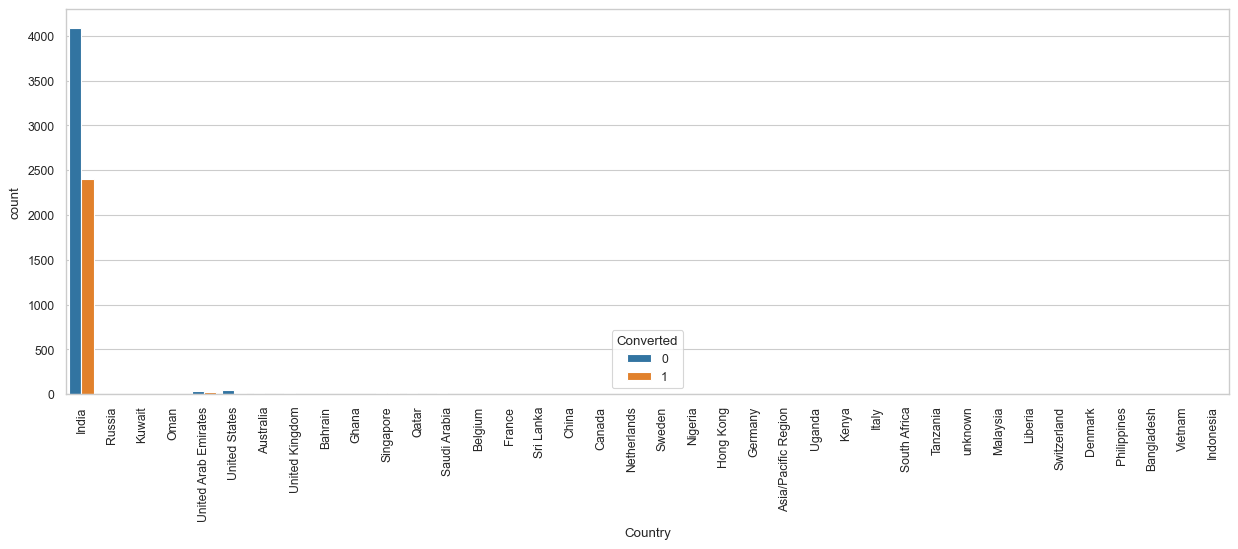

In [793]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

As we can see the Number of Values for India are quite high (about 97% of the Data),which leads to skewness in Data hence this column can be dropped

In [794]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [795]:
leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [796]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

In [797]:
leads = leads.replace('Select',np.nan)

In [798]:
leads['City'].value_counts(dropna=False)

Mumbai                         4642
NaN                            2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [799]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

In [800]:
leads['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [801]:
leads['City'] = leads['City'].fillna((leads['City'].mode()[0]))

In [802]:
leads['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

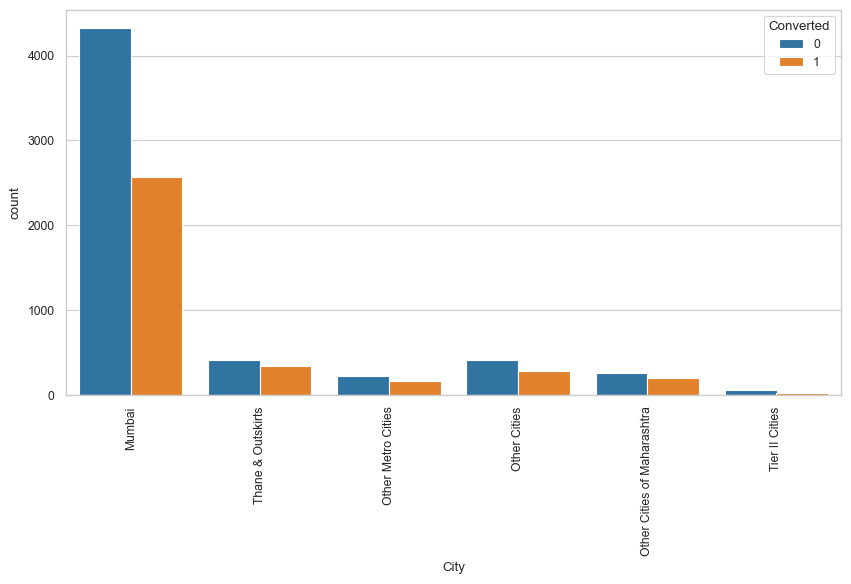

In [803]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [804]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [805]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

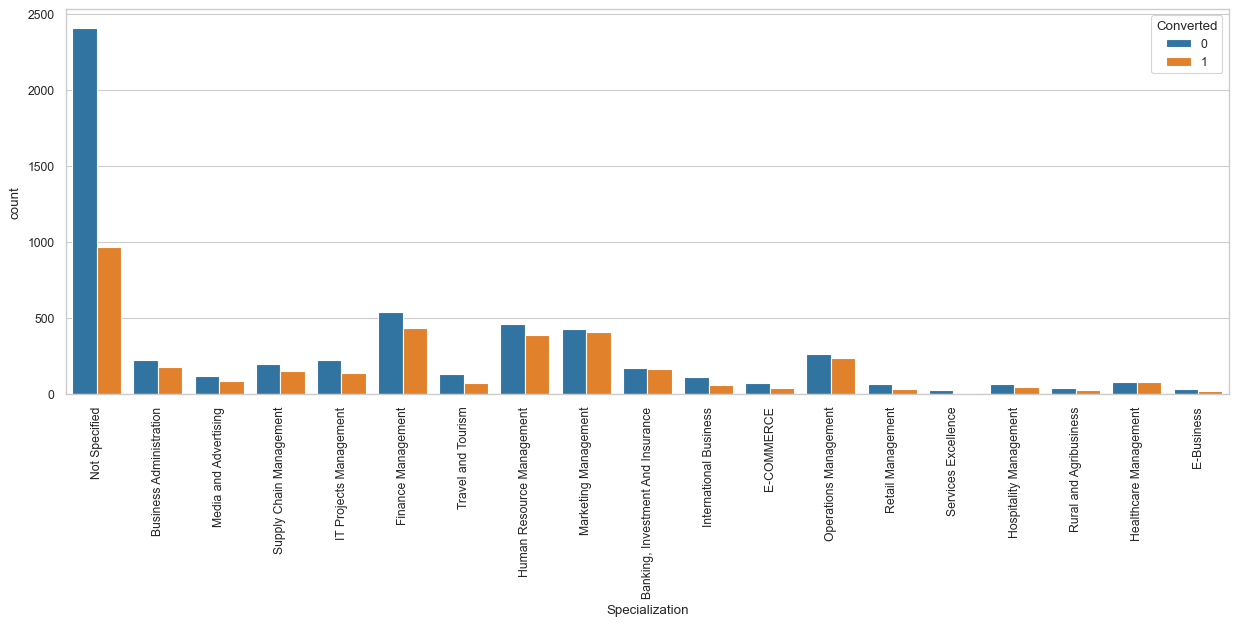

In [806]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We see that specialization with Finance,Hr ,Marketing,operations Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [807]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

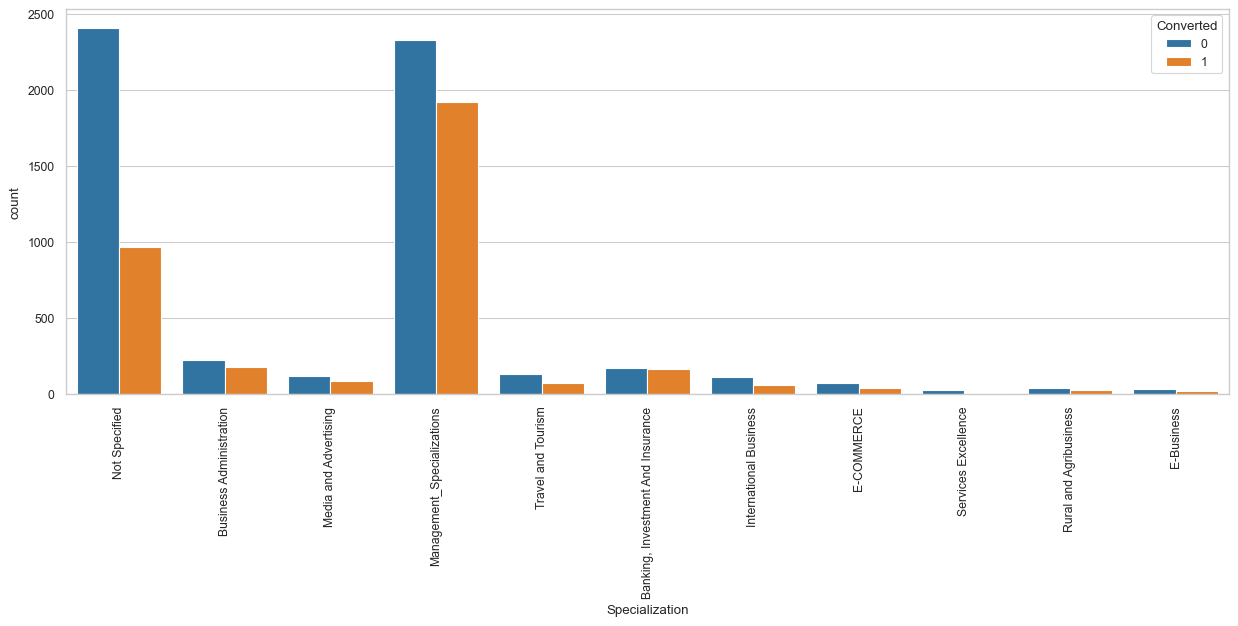

In [808]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [809]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [810]:
leads['What is your current occupation'].mode()[0]

'Unemployed'

In [811]:
#imputing Nan values with mode "Unemployed"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

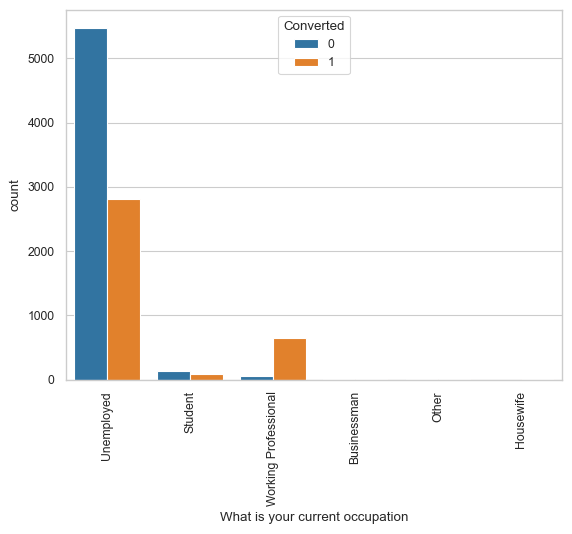

In [812]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Working Professionals going for the course have high chances of joining it. Almost 50 % of Unemployed leads are geting converted.

In [813]:
#checking value counts

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [814]:
#replacing Nan values with Mode "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

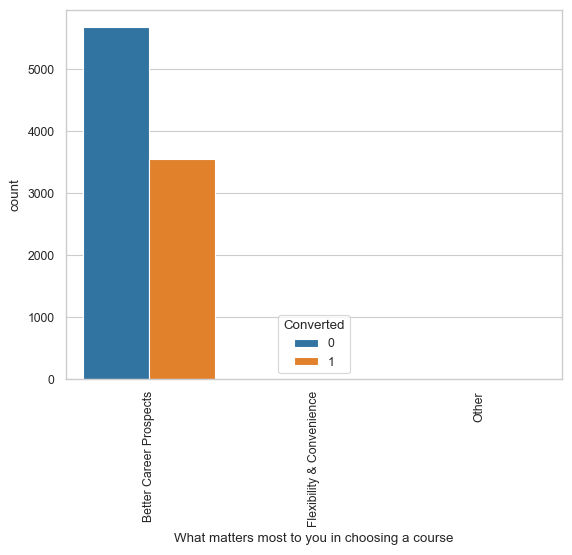

In [815]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [816]:
#checking value counts of variable
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [817]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [818]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
How did you hear about X Education               78.46
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [819]:
100*(leads.isnull().sum())

Prospect ID                                           0
Lead Number                                           0
Lead Origin                                           0
Lead Source                                        3600
Do Not Email                                          0
Do Not Call                                           0
Converted                                             0
TotalVisits                                       13700
Total Time Spent on Website                           0
Page Views Per Visit                              13700
Last Activity                                     10300
Country                                          246100
Specialization                                        0
How did you hear about X Education               725000
What is your current occupation                       0
What matters most to you in choosing a course         0
Search                                                0
Magazine                                        

In [820]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [821]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

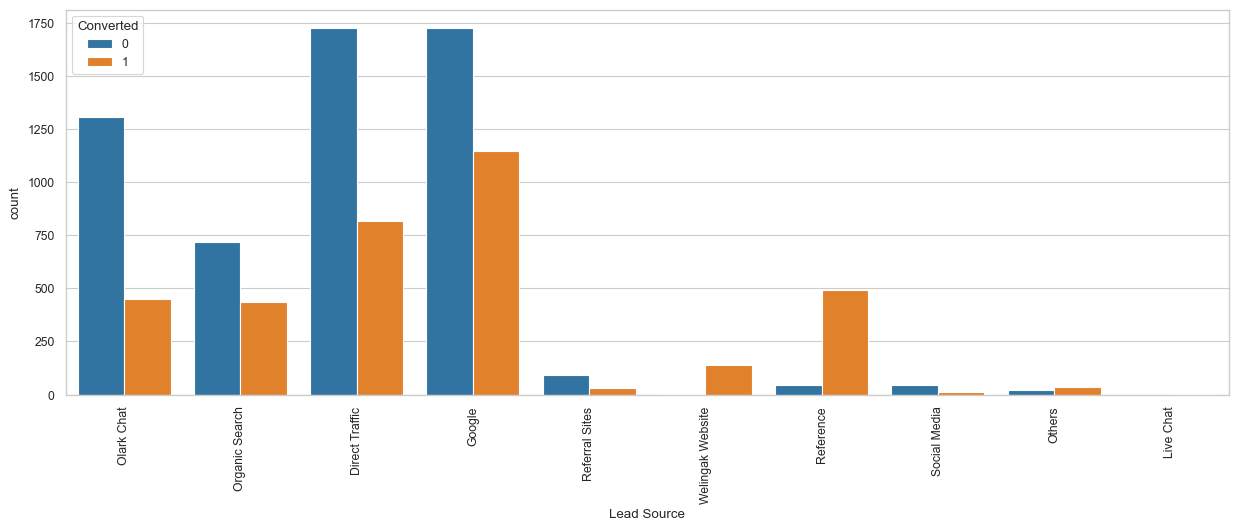

In [822]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference

Maximum number of leads are generated by Google and Direct traffic.

Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [823]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [824]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [825]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [826]:
leads['Lead Profile'].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [827]:
leads['Lead Profile']=leads['Lead Profile'].replace(np.NaN,"Not specified")

In [828]:
# value counts of all the columns

for column in leads:
    print(leads[column].astype('category').value_counts(dropna=False))
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

In [829]:
#Check the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
How did you hear about X Education               78.46
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [830]:
leads.drop("How did you hear about X Education",1,inplace= True)

In [831]:
#Check the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [832]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()

In [833]:
#Check the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [834]:
# value counts of all the columns

for column in leads:
    print(leads[column].astype('category').value_counts(dropna=False))
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
ab95807d-974c-4b2b-b1a0-939703474db7    1
ab7109ae-d6c8-4f82-971b-b363d4c9b939    1
ab657a51-f2fe-4913-9064-48b94884b810    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
5398e7ff-74db-4074-89fb-4fd9a603f521    1
53953744-234a-4cb9-9af4-bcc47eb472f4    1
5390c5fe-b12c-4f6e-ae92-908672abb0a1    1
fff4f056-6574-4f97-b85a-ea4198a2915b    1
Name: Prospect ID, Length: 6779, dtype: int64
___________________________________________________
579533    1
630888    1
631168    1
631159    1
631155    1
         ..
602920    1
602915    1
602873    1
602867    1
660728    1
Name: Lead Number, Length: 6779, dtype: int64
___________________________________________________
Landing Page Submission    4850
API                        1902
Lead Add Form                27
Name: Lead Origin, dtype: int64
___________________________________________________
Google              2851
Direc

Inference

Customer Prefers No Calls
Course Attracts More for Better career prospects

They have not seen ads in Magazines,Search,Newspaper Article,X Education Forums,News paper

They Dont want updates about course,supply chain content,or Dms


In [835]:
cols_to_drop1=[]
cols_to_drop1.extend(["Country","What matters most to you in choosing a course","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Magazine","Search","What matters most to you in choosing a course","Through Recommendations","Receive More Updates About Our Courses","Get updates on DM Content","I agree to pay the amount through cheque"])
cols_to_drop1

['Country',
 'What matters most to you in choosing a course',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Magazine',
 'Search',
 'What matters most to you in choosing a course',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [836]:
cols_to_drop2=[]
cols_to_drop2.extend(["Update me on Supply Chain Content"])

In [837]:
leads=leads.drop(cols_to_drop2,1)

In [838]:
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

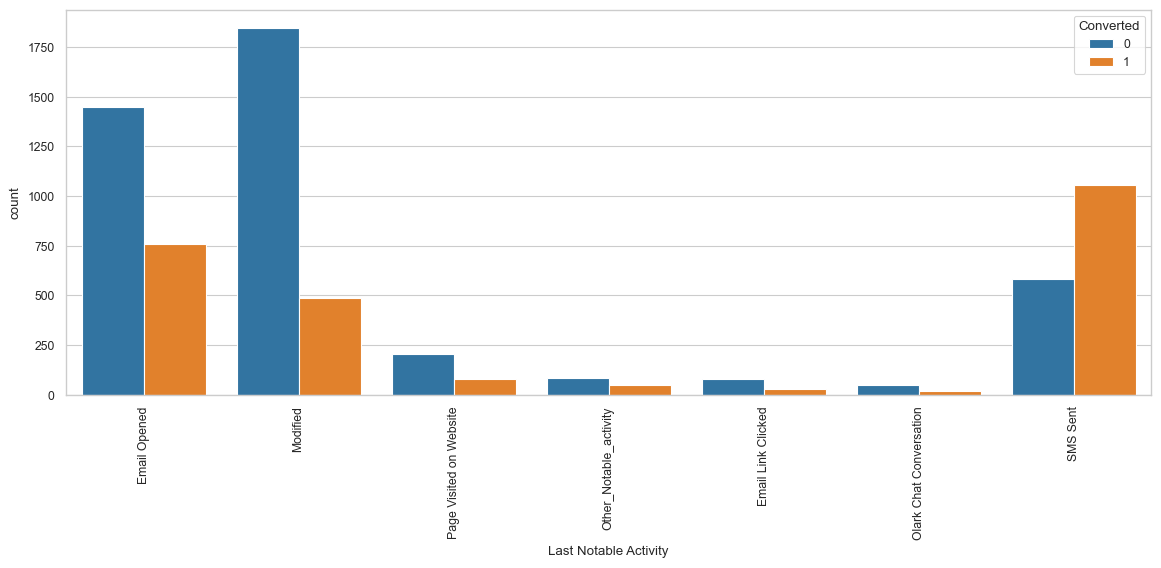

In [839]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [840]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [841]:
leads.shape

(6779, 29)

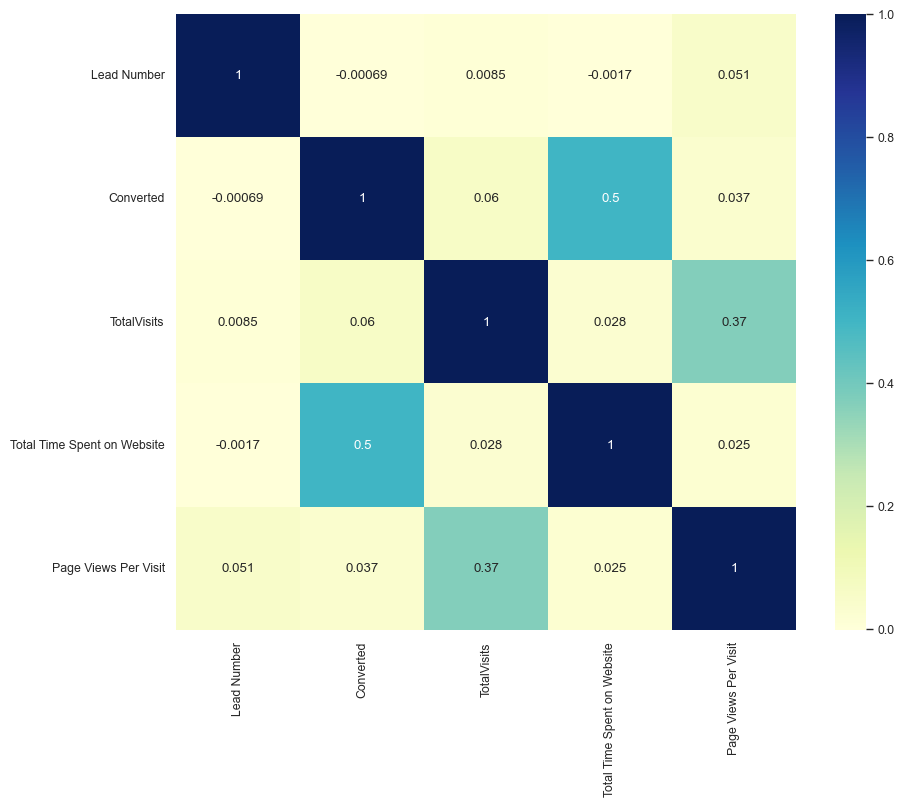

In [842]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

Checking for continous columns

In [843]:
id_cols=["Prospect ID","Lead Number"]
cont_cols=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
cat_cols=["Lead Origin","Lead Source","Do Not Email","Do Not Call","Last Activity","Specialization","What is your current occupation","Lead Profile","City","A free copy of Mastering The Interview","Last Notable Activity"]
target=["Converted"]
len(id_cols)+len(cont_cols)+len(cat_cols)+len(target)

17

In [844]:
plt.figure(figsize=(8,10))

<Figure size 800x1000 with 0 Axes>

<Figure size 800x1000 with 0 Axes>

TotalVisits


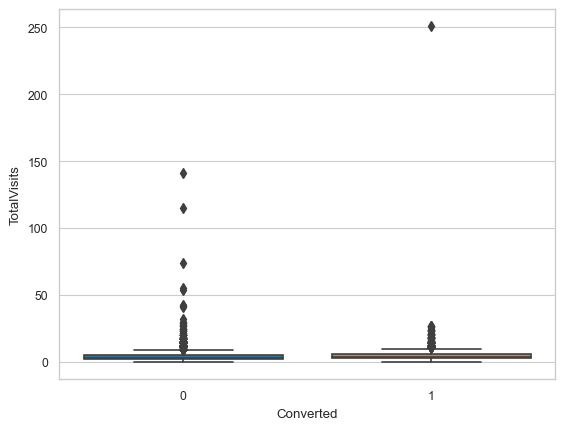

Total Time Spent on Website


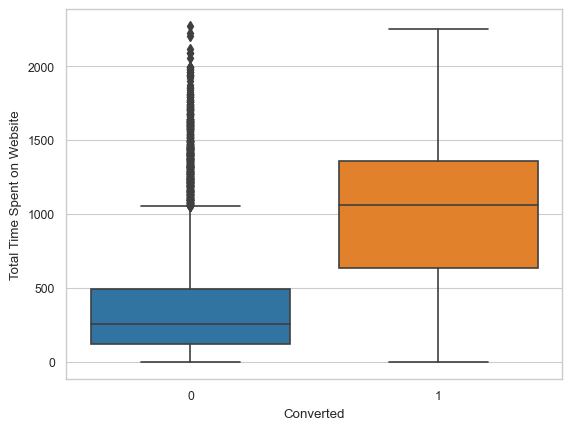

Page Views Per Visit


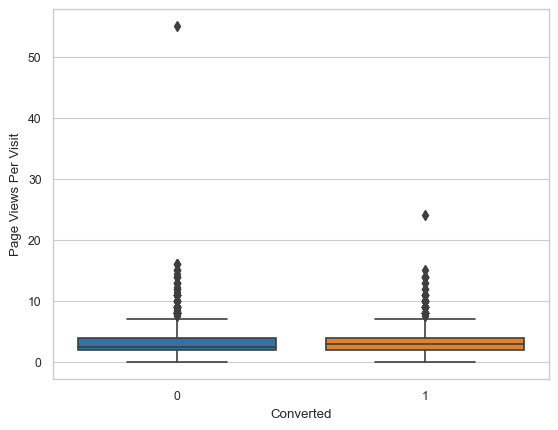

In [845]:
for i in cont_cols:
    print(i)
    sns.boxplot(x=leads.Converted,y=leads[i])
    plt.show()

In [846]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6779.000000
mean        4.553917
std         5.138148
min         0.000000
5%          1.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.220000
max       251.000000
Name: TotalVisits, dtype: float64

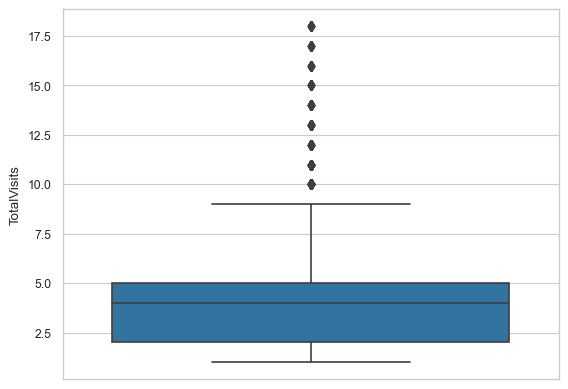

In [847]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

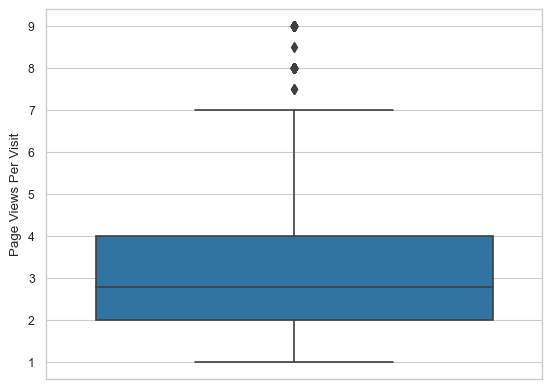

In [848]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

# Univariate Analysis

TotalVisits


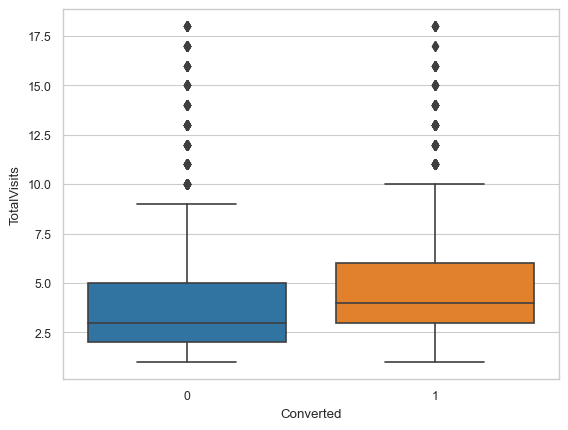

Total Time Spent on Website


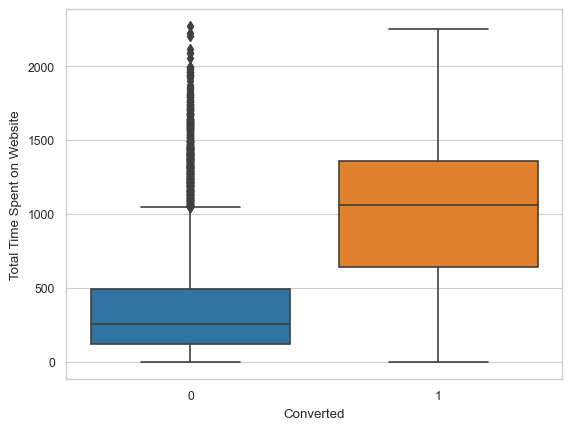

Page Views Per Visit


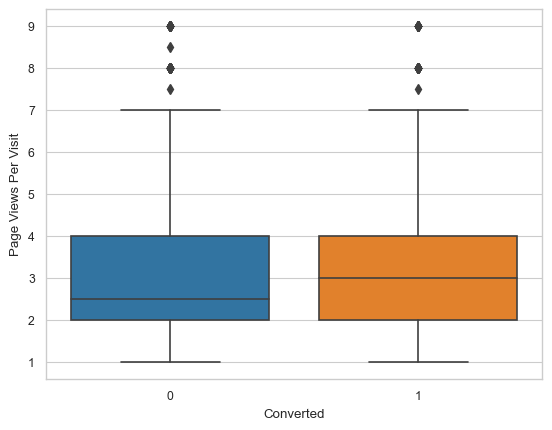

In [849]:
for i in cont_cols:
    print(i)
    sns.boxplot(x=leads.Converted,y=leads[i])
    plt.show()

Lead Origin


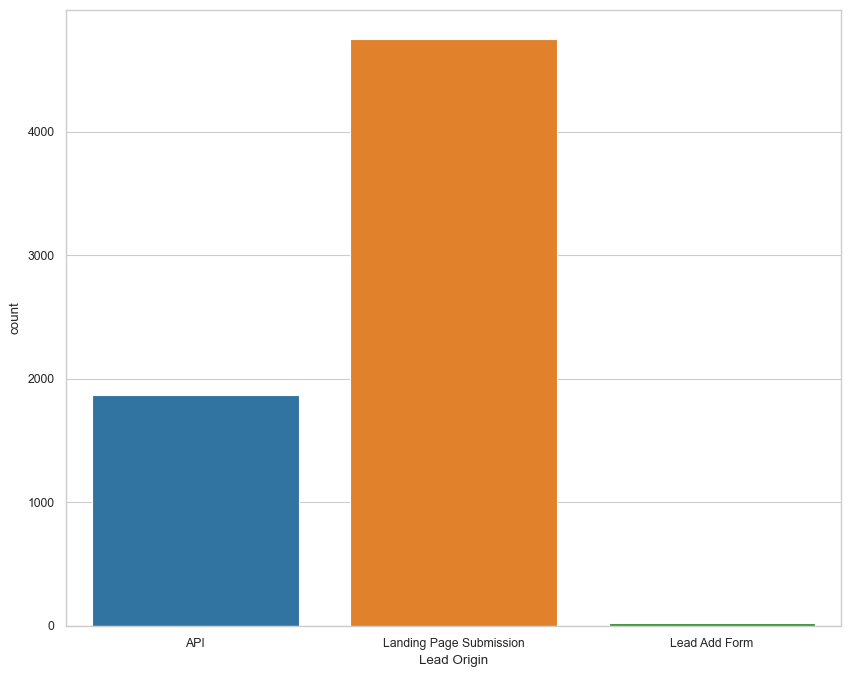

Lead Source


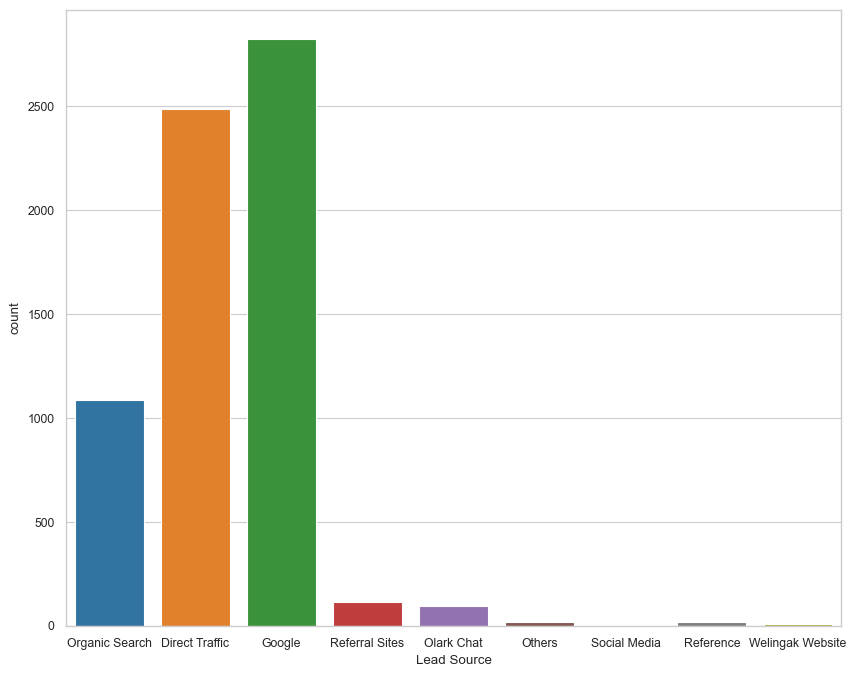

Do Not Email


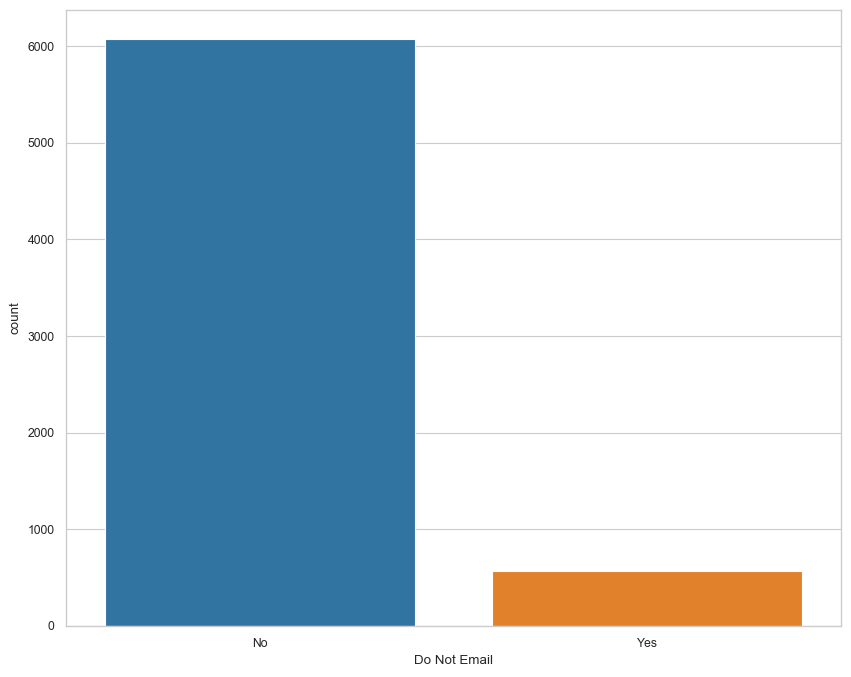

Do Not Call


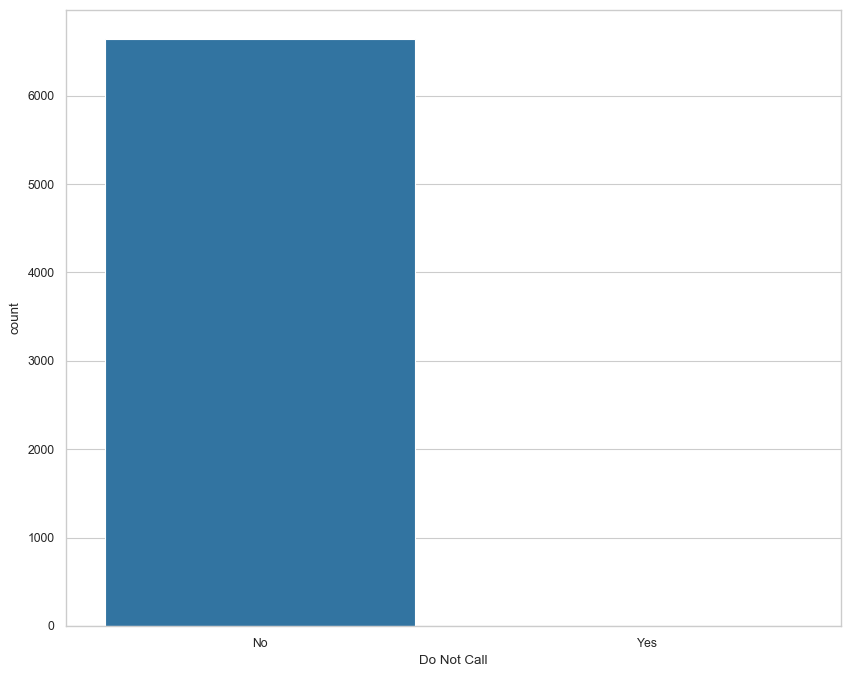

Last Activity


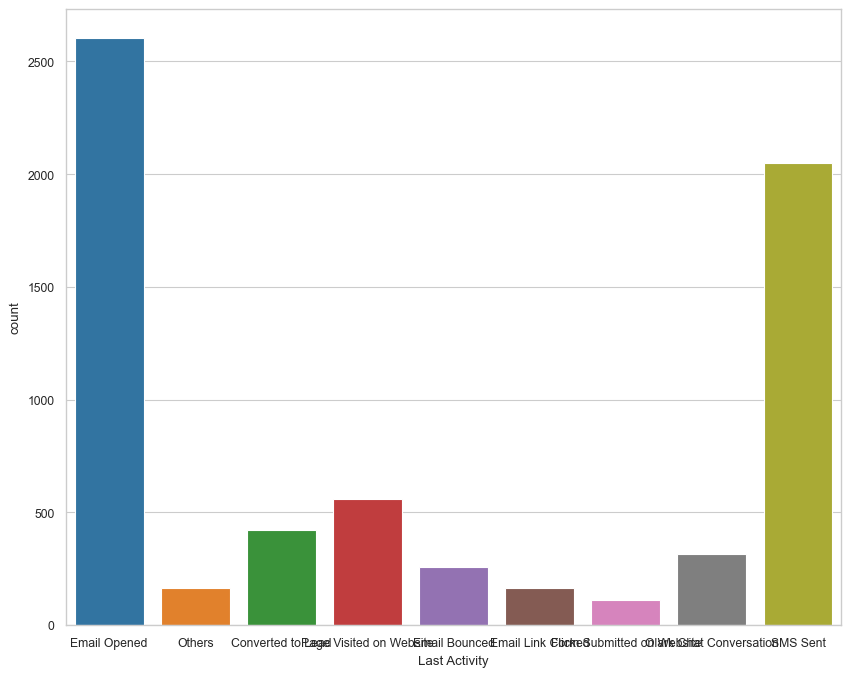

Specialization


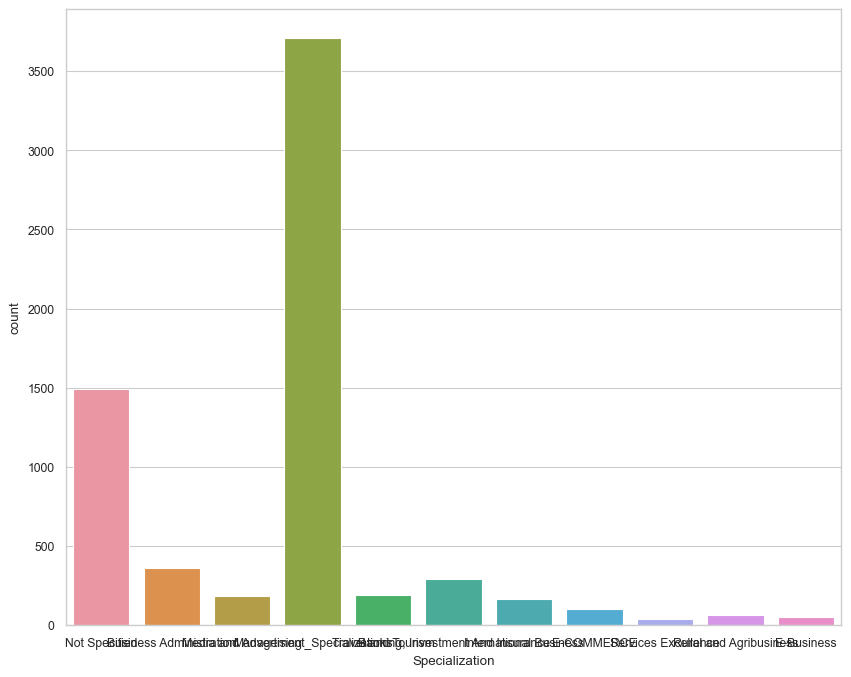

What is your current occupation


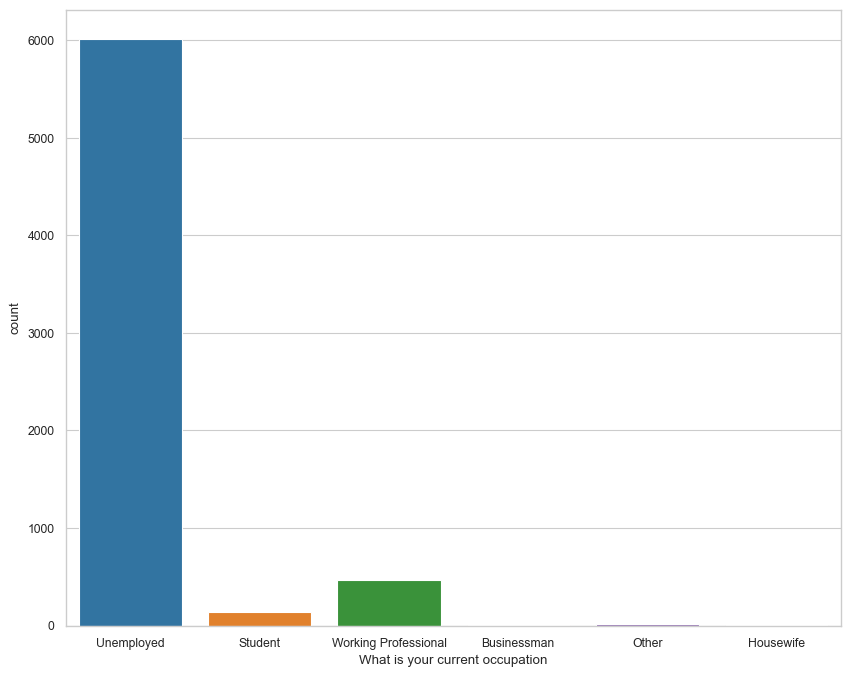

Lead Profile


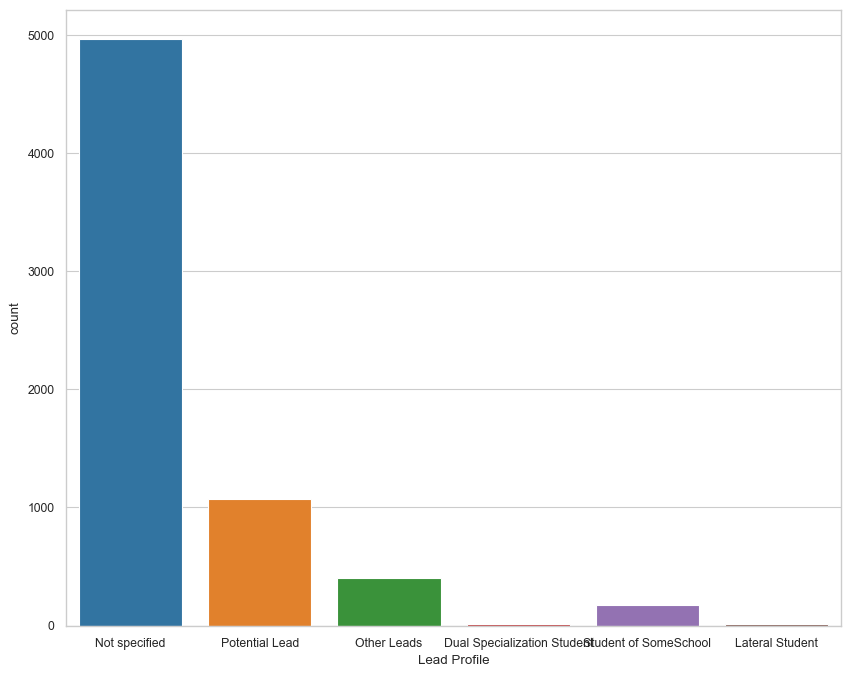

City


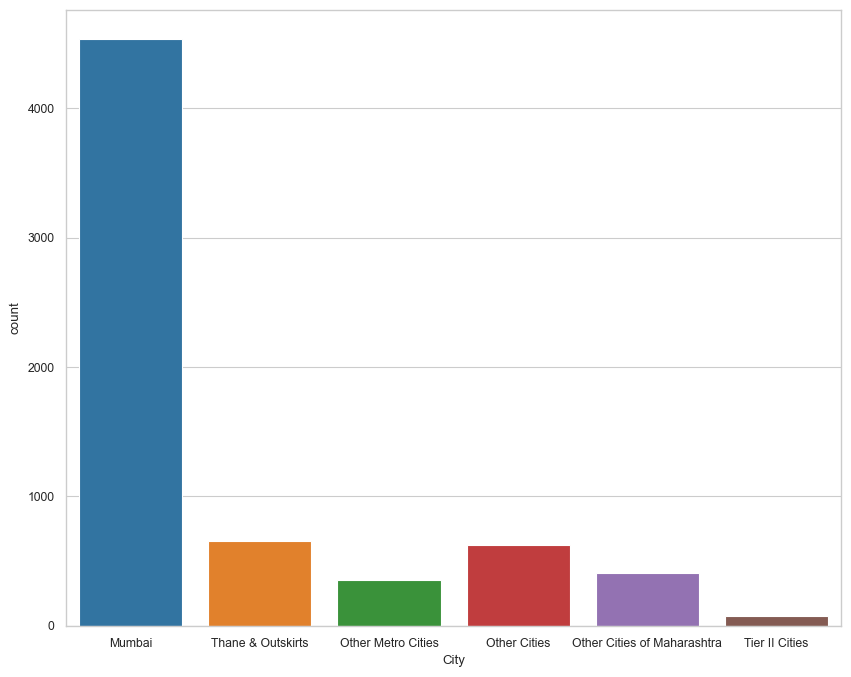

A free copy of Mastering The Interview


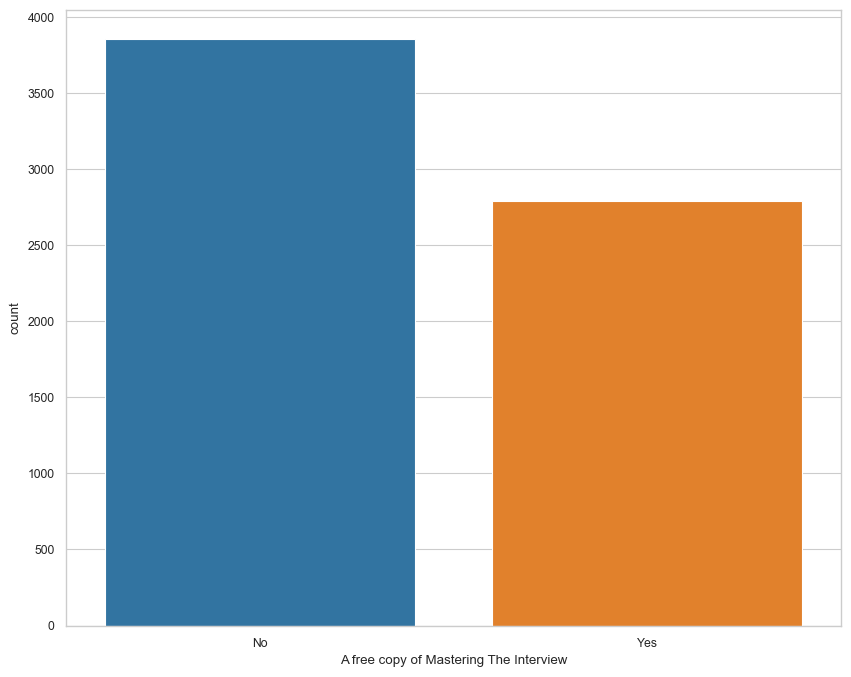

Last Notable Activity


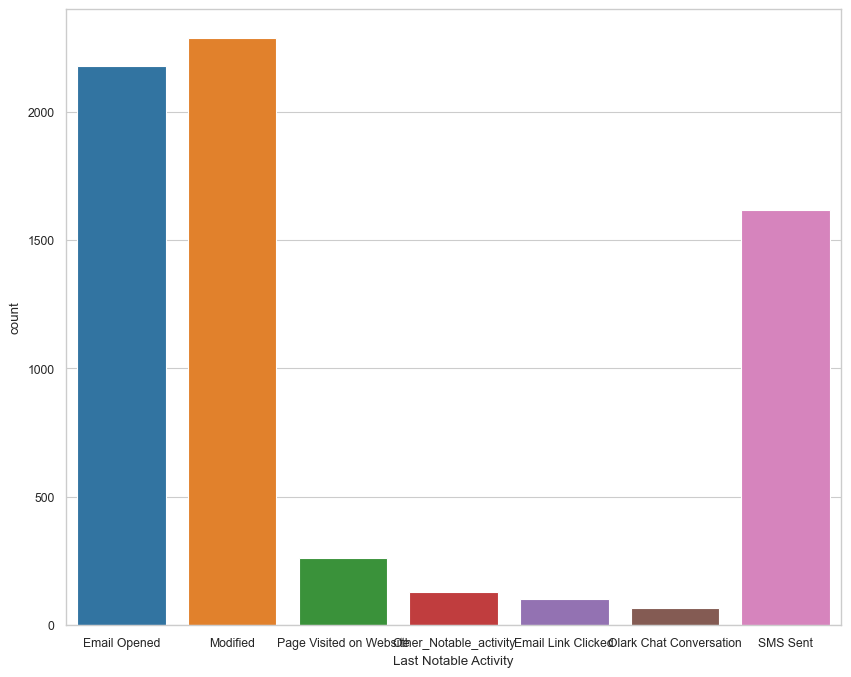

In [850]:

for i in cat_cols:
    print(i)
    plt.figure(figsize=(10,8))
    sns.countplot(leads[i])
    plt.show()

TotalVisits


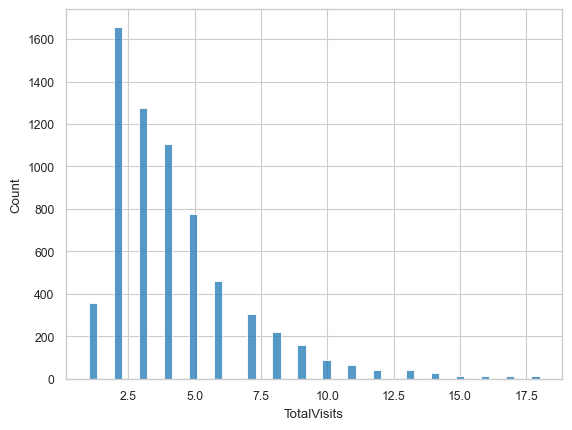

Total Time Spent on Website


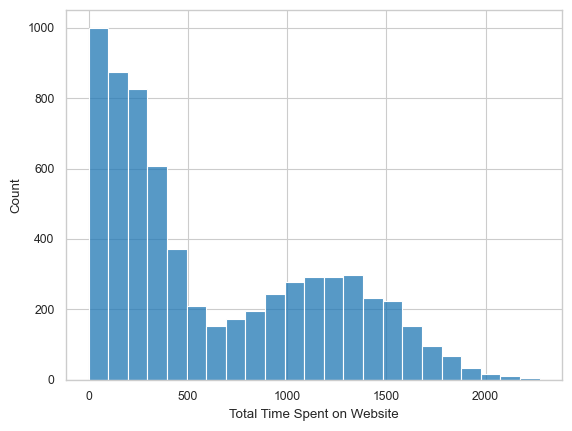

Page Views Per Visit


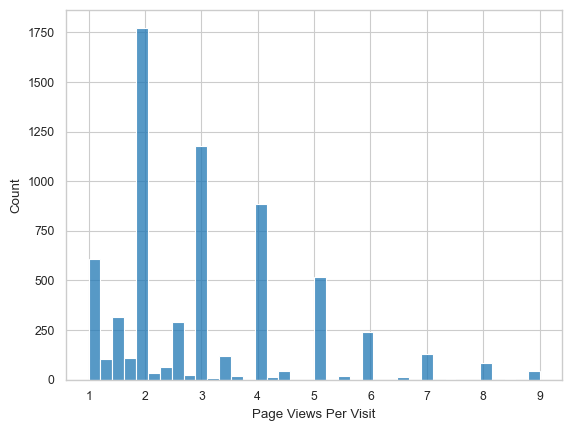

In [652]:
for i in cont_cols:
    print(i)
    sns.histplot(leads[i])
    plt.show()

# Bivariate Analysis

ScatterPlot TotalVisits Vs Total Time Spent on Website


<Figure size 1000x800 with 0 Axes>

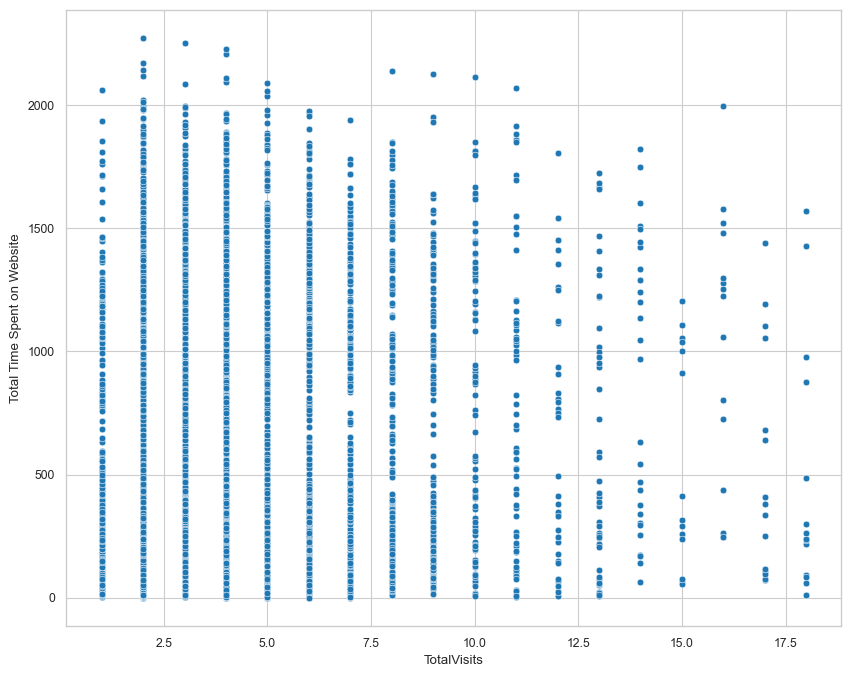

ScatterPlot TotalVisits Vs Page Views Per Visit


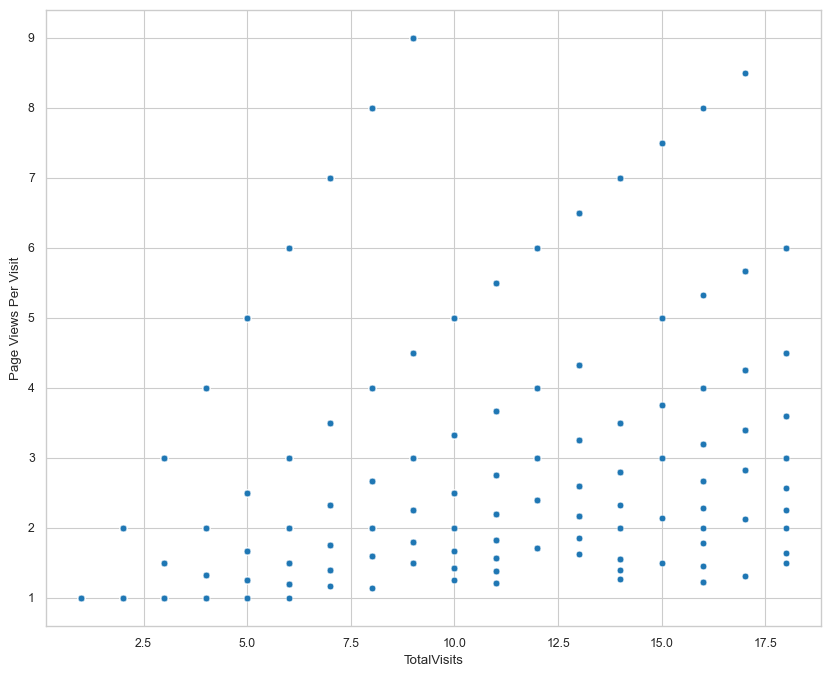

ScatterPlot Total Time Spent on Website Vs TotalVisits


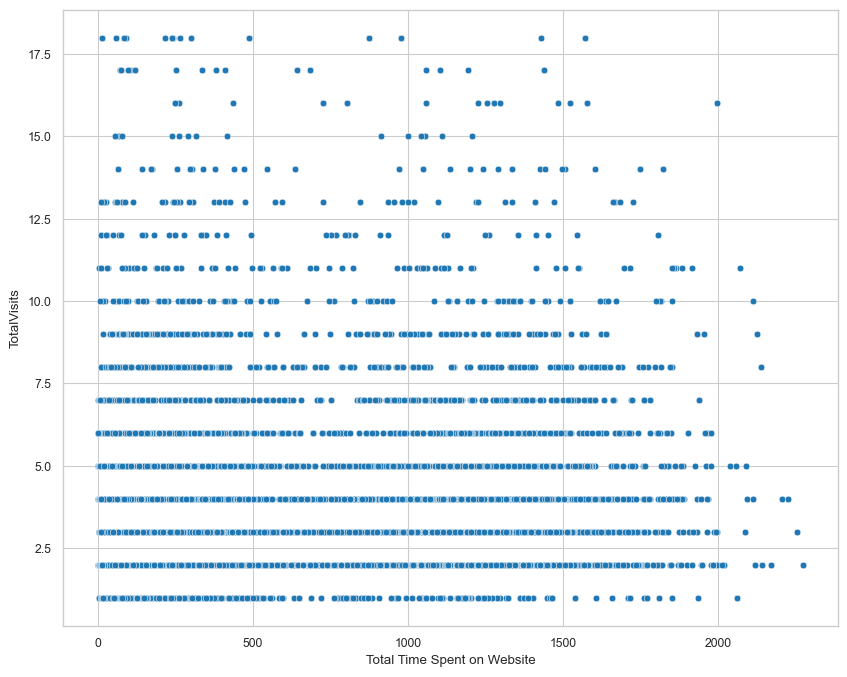

ScatterPlot Total Time Spent on Website Vs Page Views Per Visit


<Figure size 1000x800 with 0 Axes>

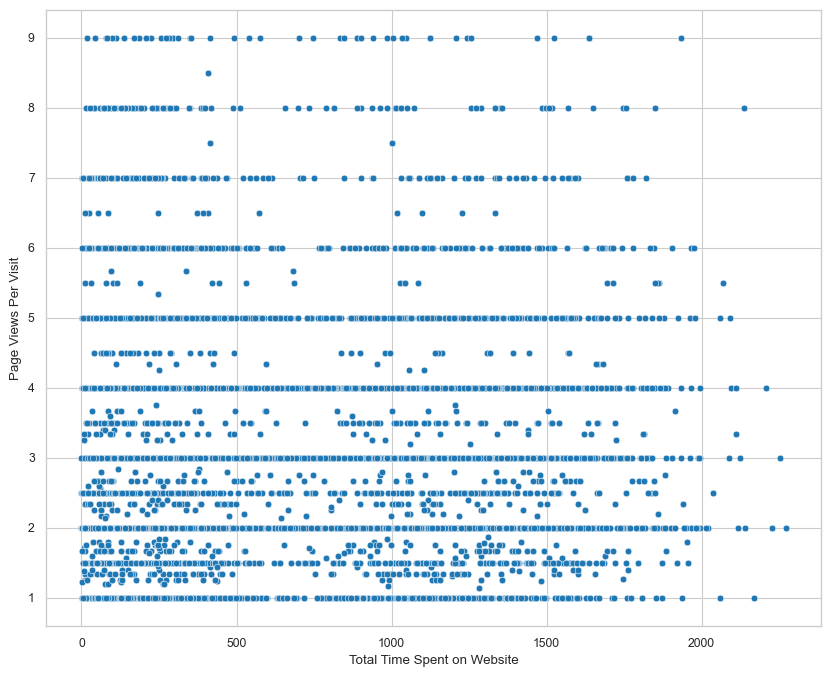

ScatterPlot Page Views Per Visit Vs TotalVisits


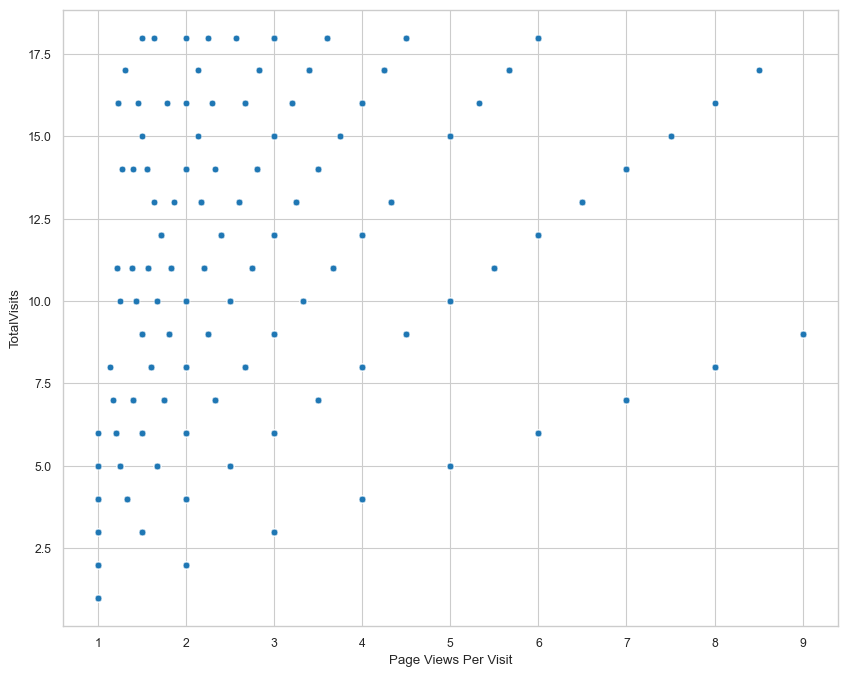

ScatterPlot Page Views Per Visit Vs Total Time Spent on Website


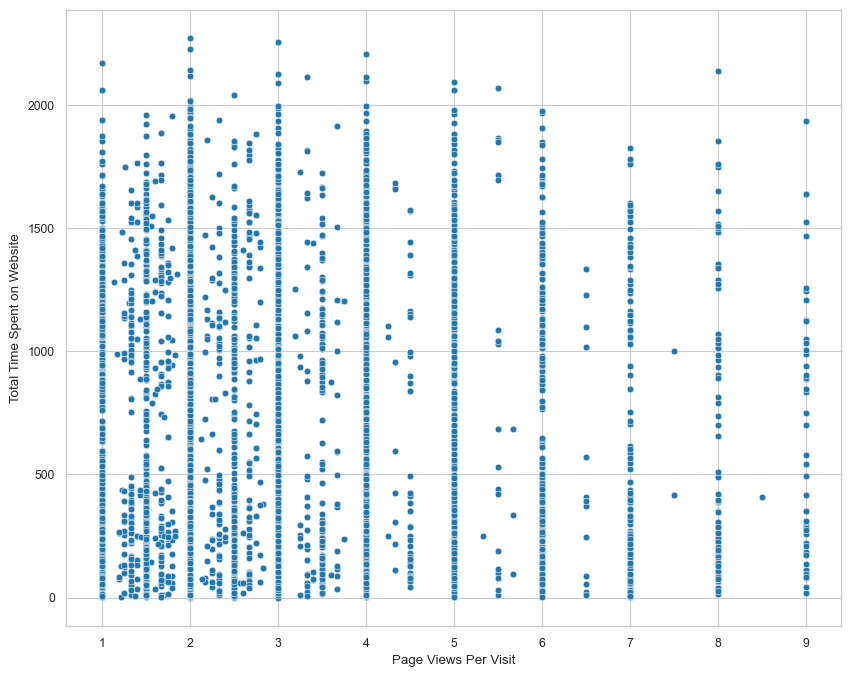

<Figure size 1000x800 with 0 Axes>

In [653]:
for i in cont_cols:
    for j in cont_cols:
        plt.figure(figsize=(10,8))
        if i!=j:
            print("ScatterPlot",i,"Vs",j)
            sns.scatterplot(leads[i],leads[j])
            plt.show()

Boxplot TotalVisits Vs Lead Origin


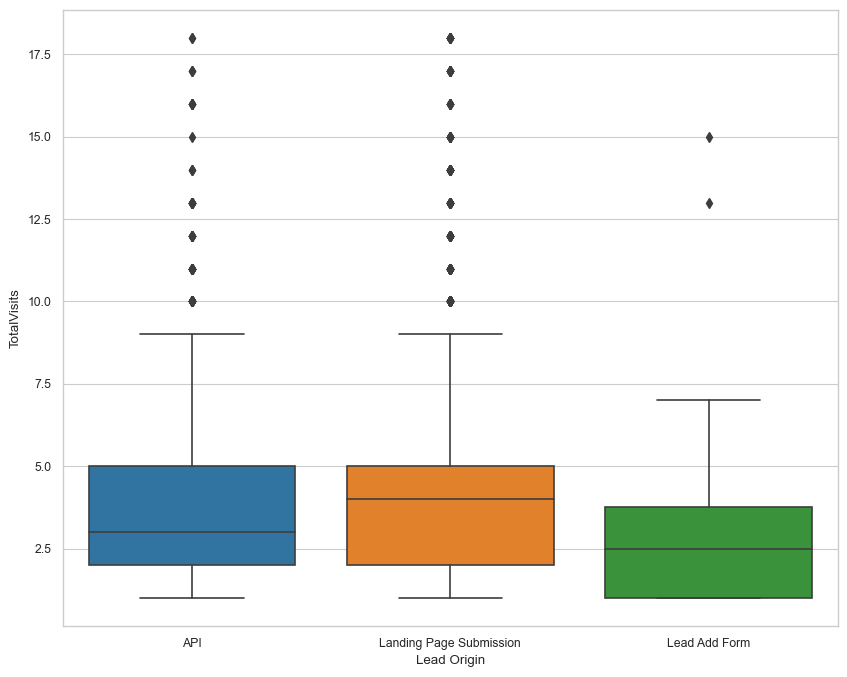

Boxplot TotalVisits Vs Lead Source


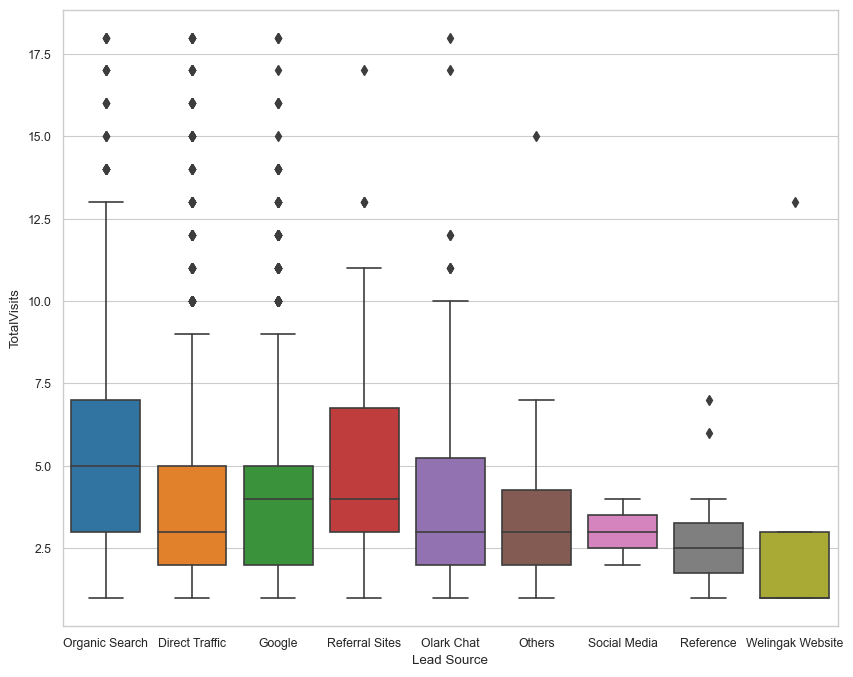

Boxplot TotalVisits Vs Do Not Email


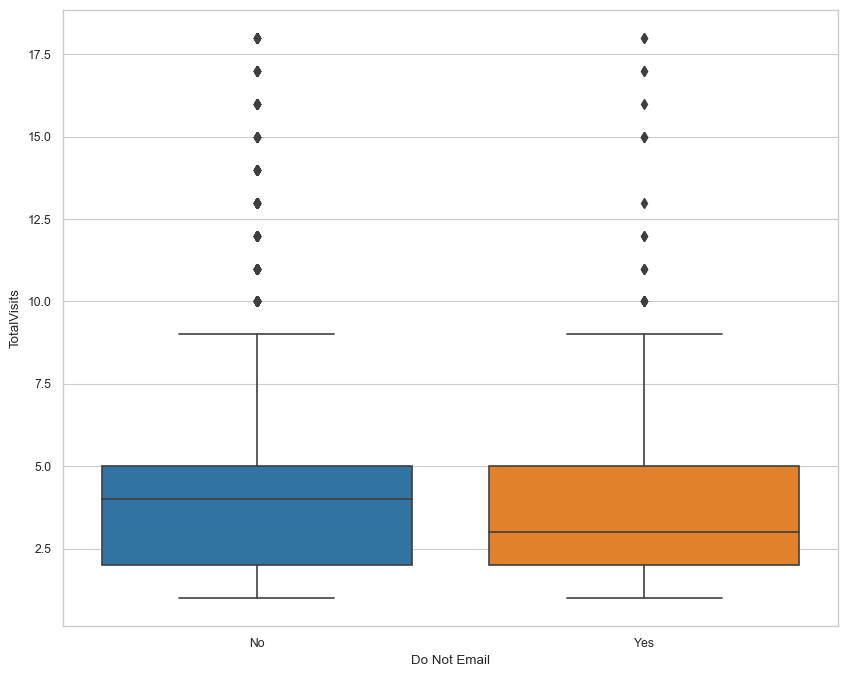

Boxplot TotalVisits Vs Do Not Call


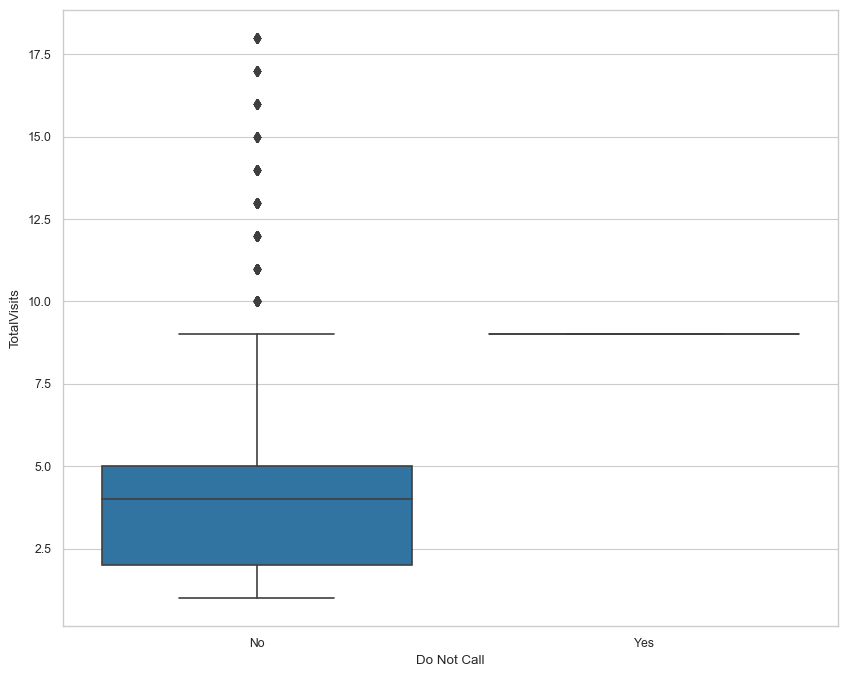

Boxplot TotalVisits Vs Last Activity


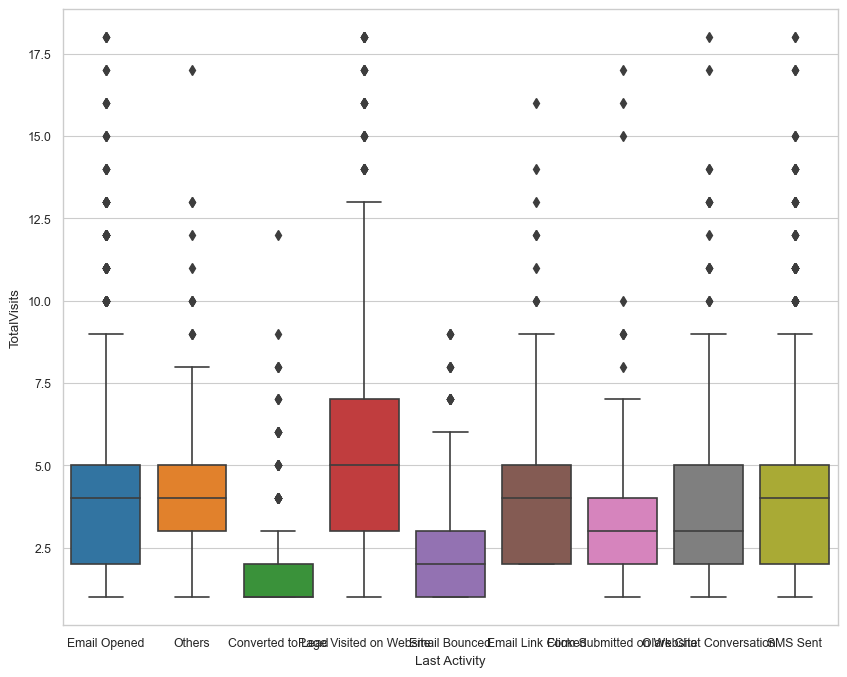

Boxplot TotalVisits Vs Specialization


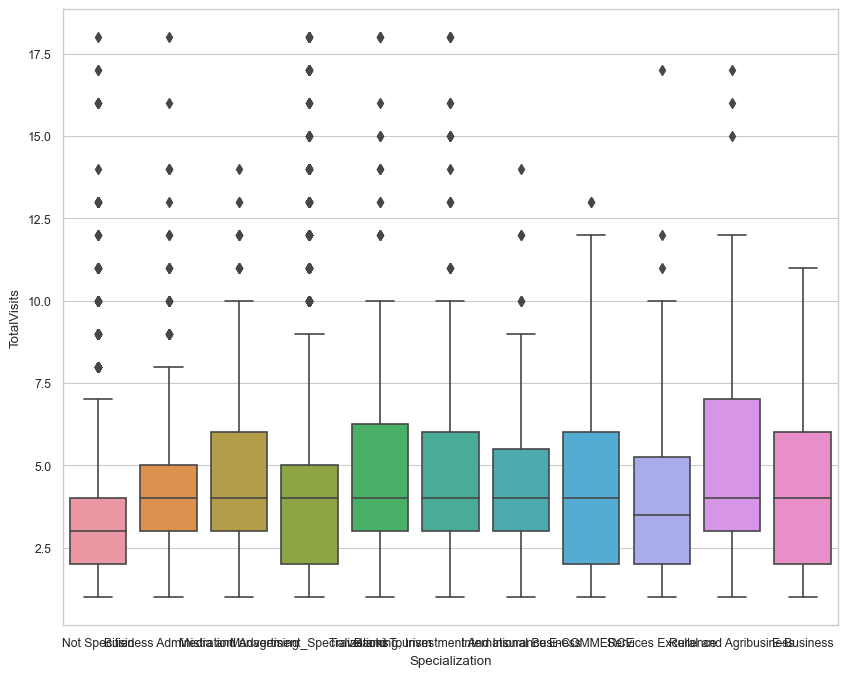

Boxplot TotalVisits Vs What is your current occupation


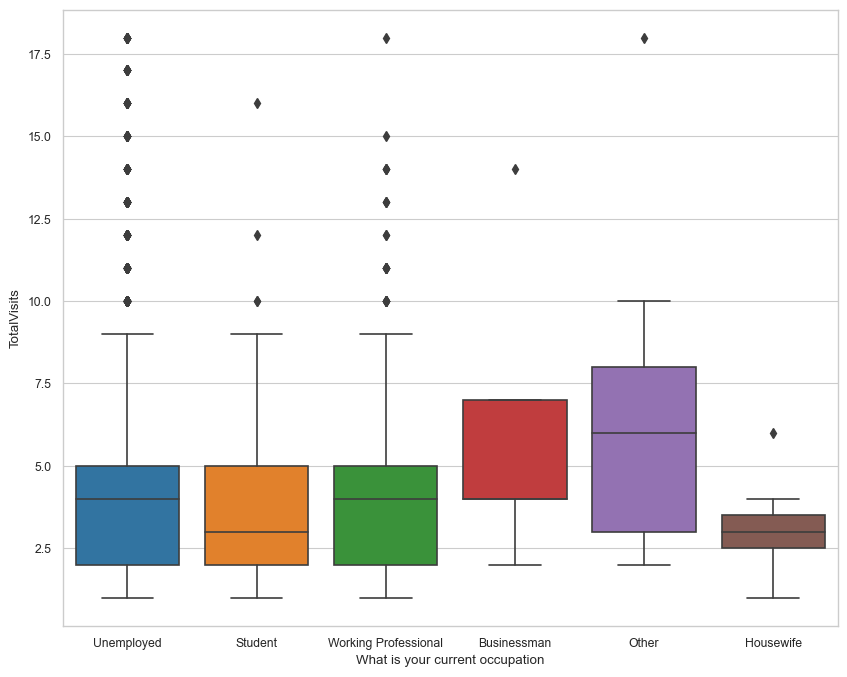

Boxplot TotalVisits Vs Lead Profile


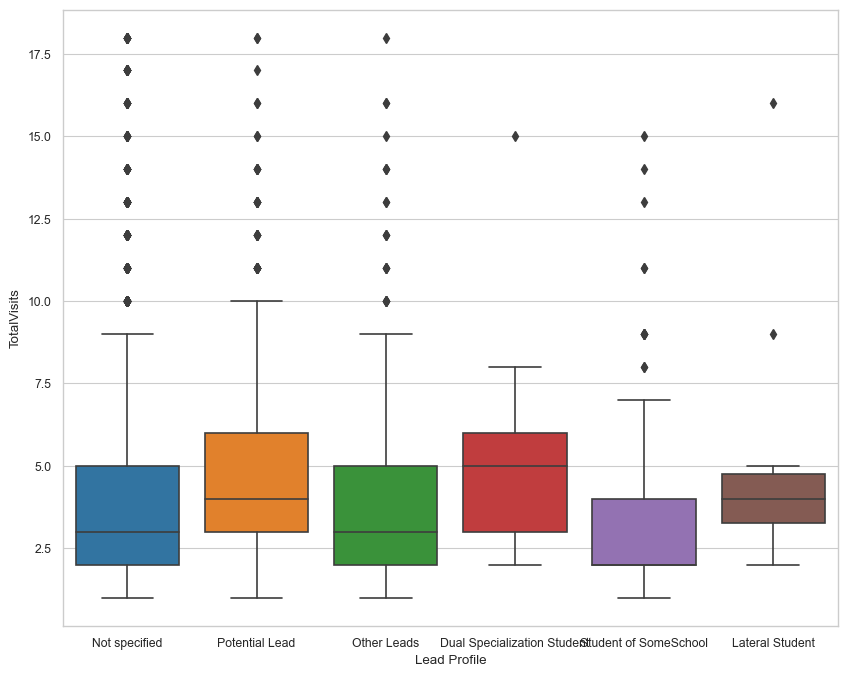

Boxplot TotalVisits Vs City


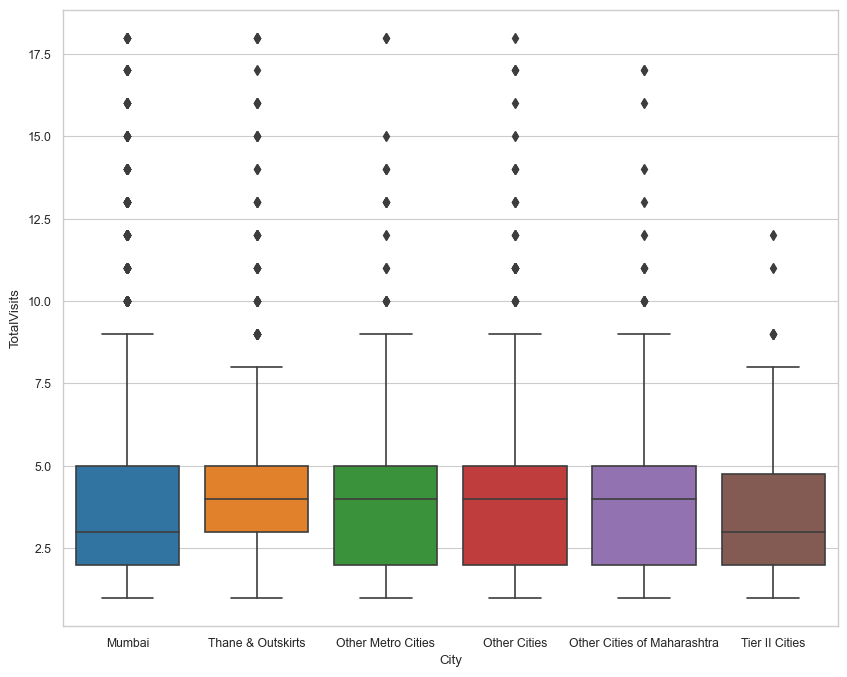

Boxplot TotalVisits Vs A free copy of Mastering The Interview


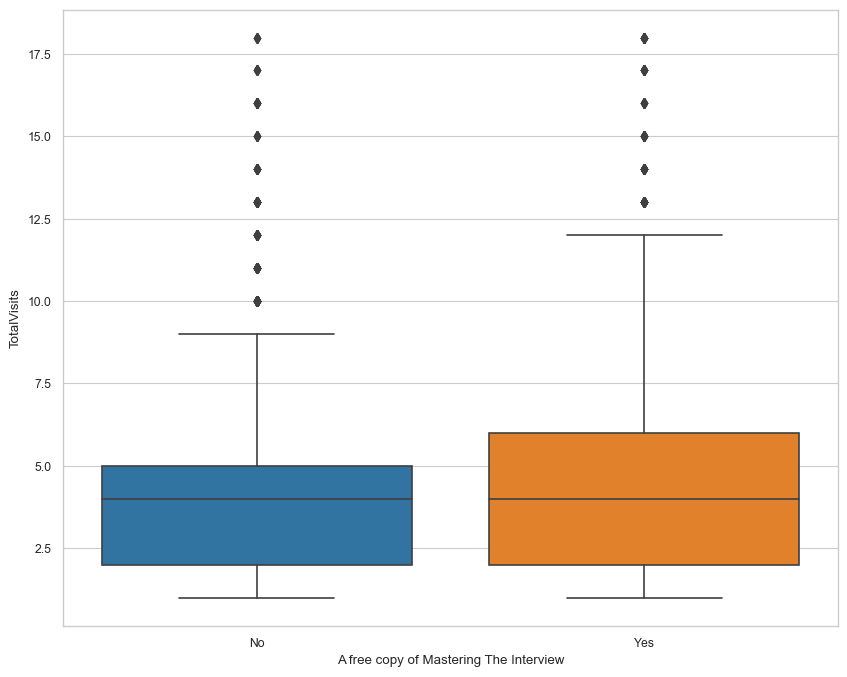

Boxplot TotalVisits Vs Last Notable Activity


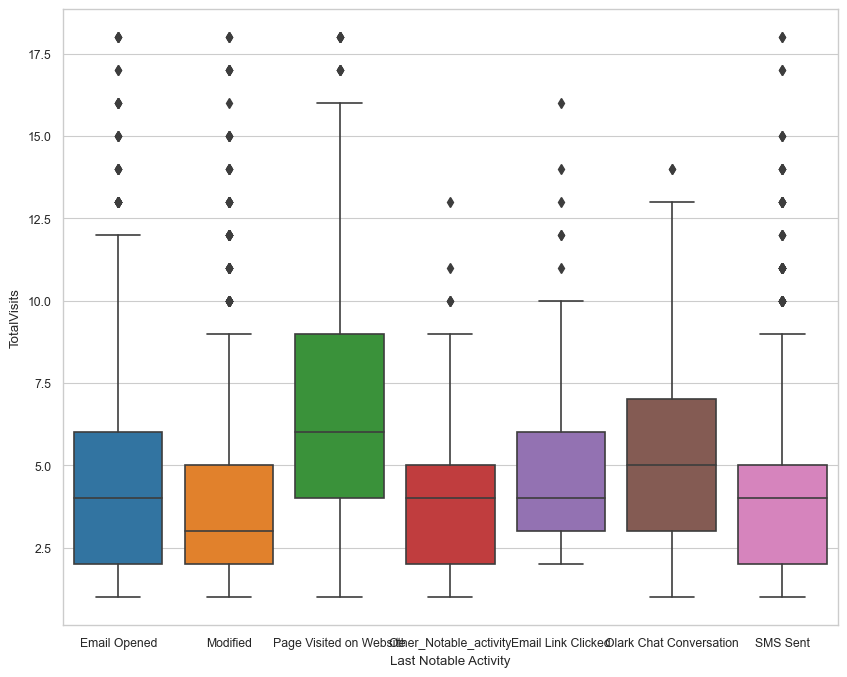

Boxplot Total Time Spent on Website Vs Lead Origin


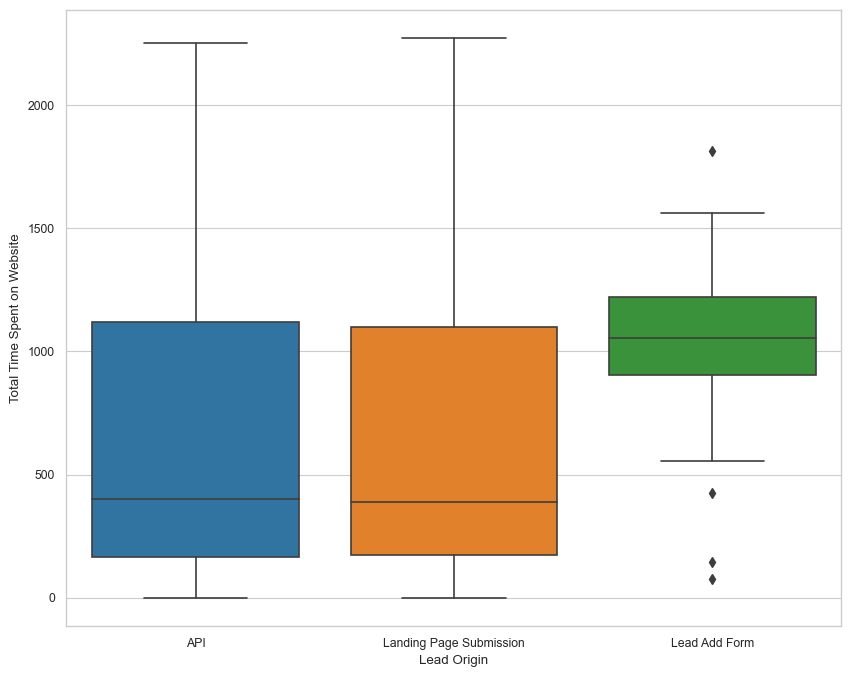

Boxplot Total Time Spent on Website Vs Lead Source


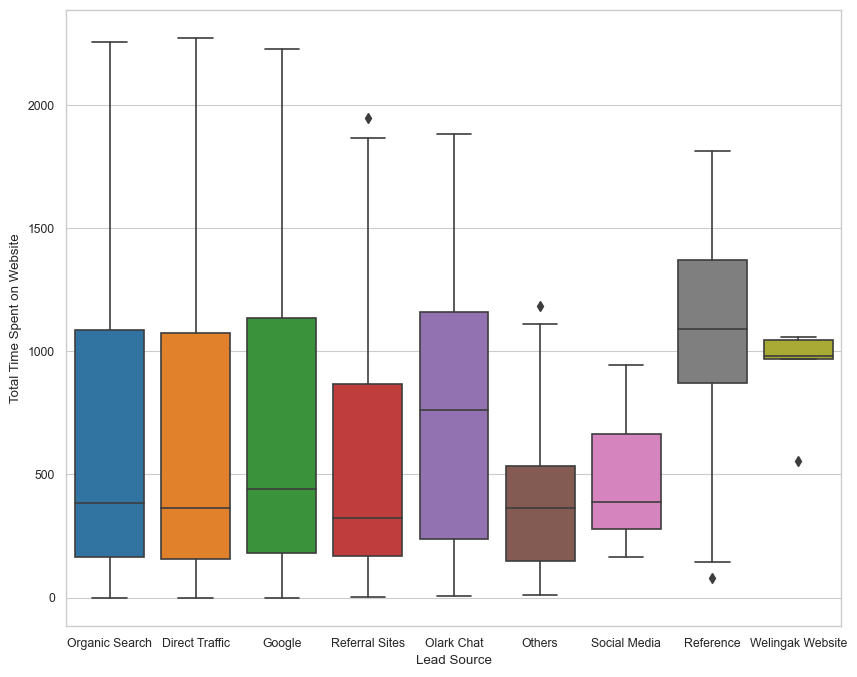

Boxplot Total Time Spent on Website Vs Do Not Email


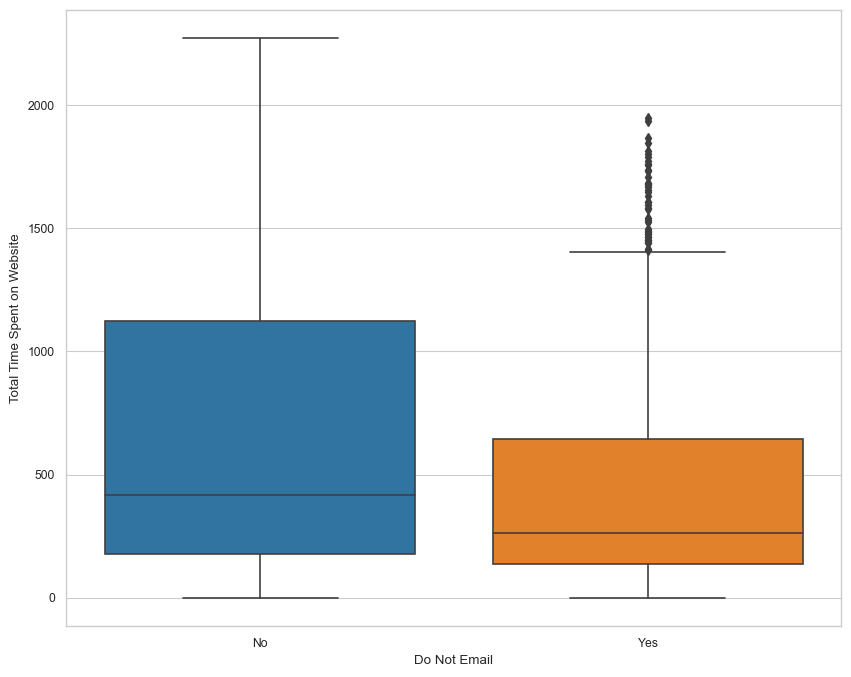

Boxplot Total Time Spent on Website Vs Do Not Call


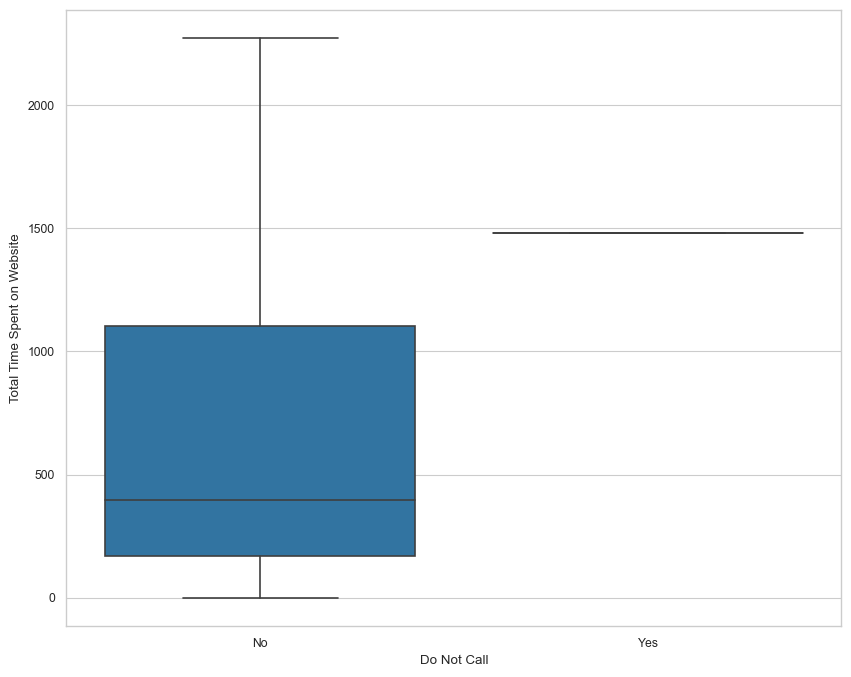

Boxplot Total Time Spent on Website Vs Last Activity


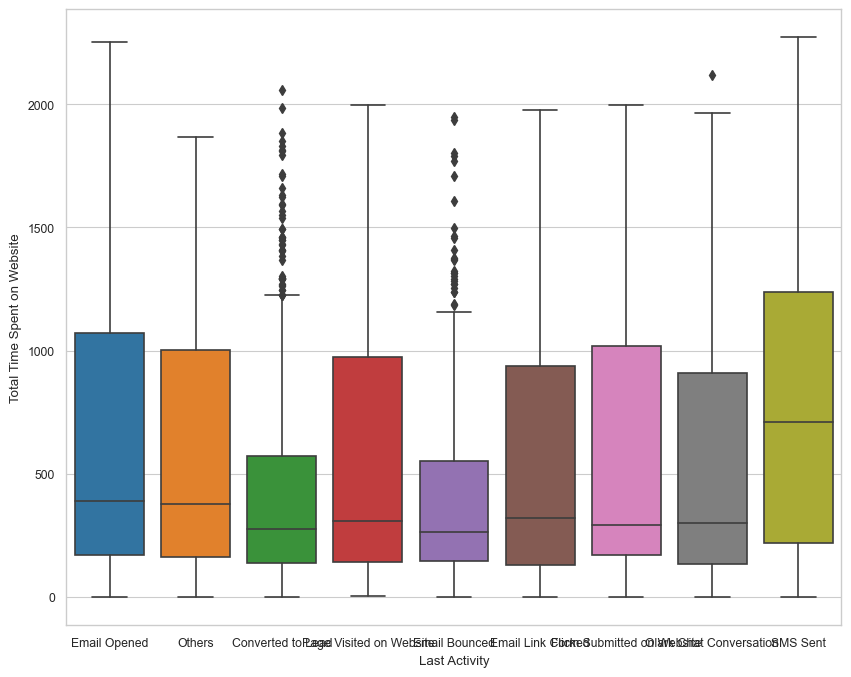

Boxplot Total Time Spent on Website Vs Specialization


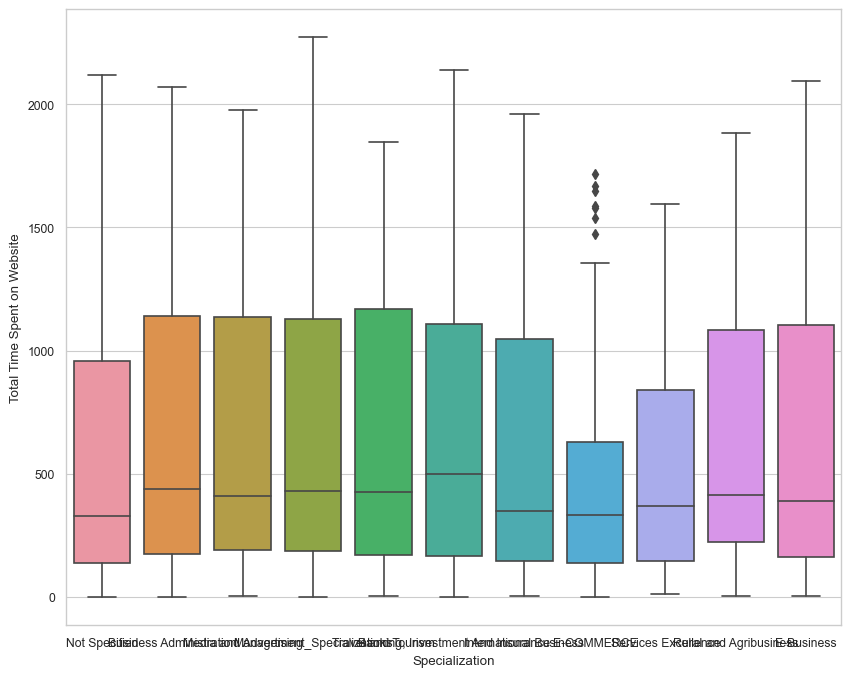

Boxplot Total Time Spent on Website Vs What is your current occupation


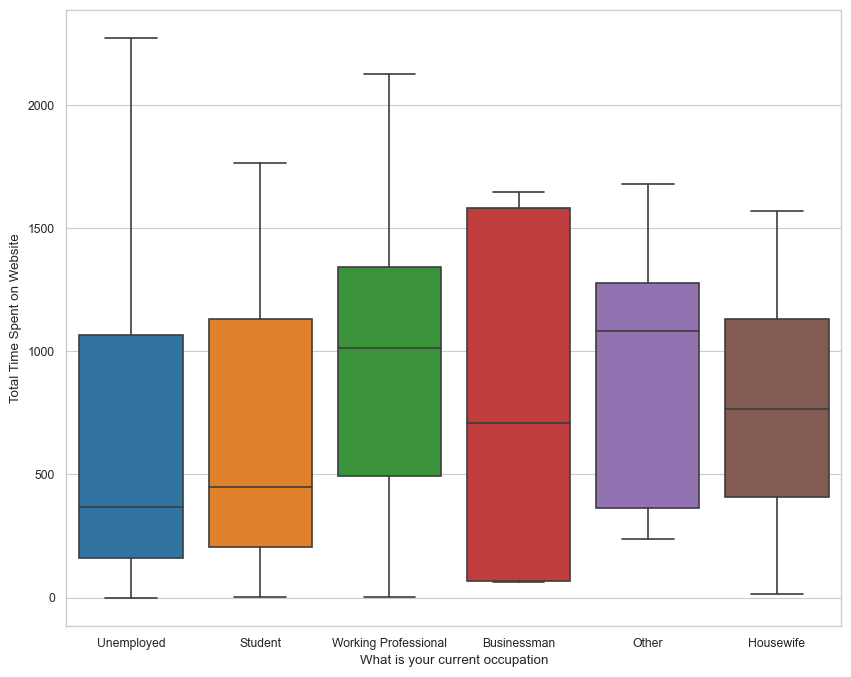

Boxplot Total Time Spent on Website Vs Lead Profile


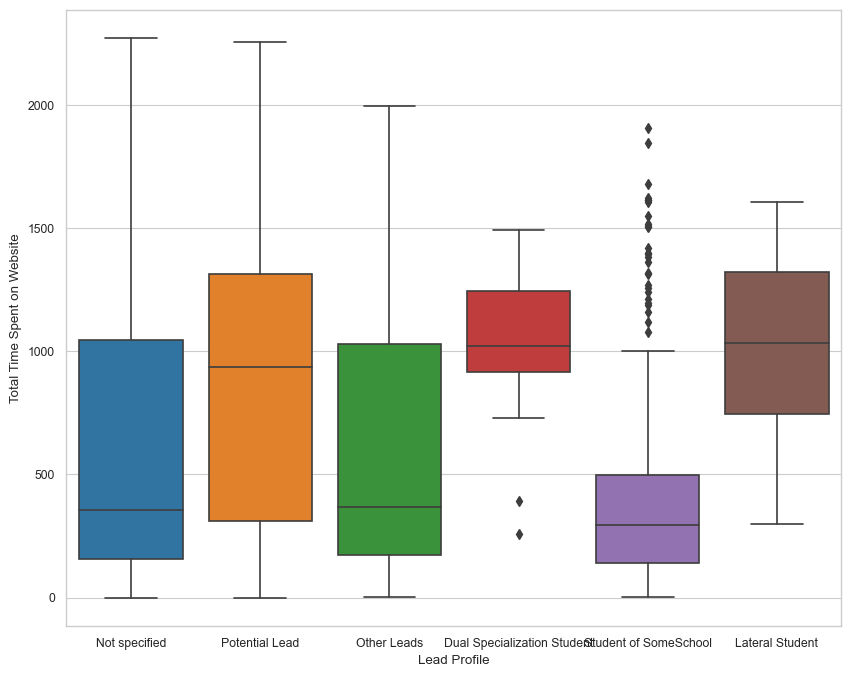

Boxplot Total Time Spent on Website Vs City


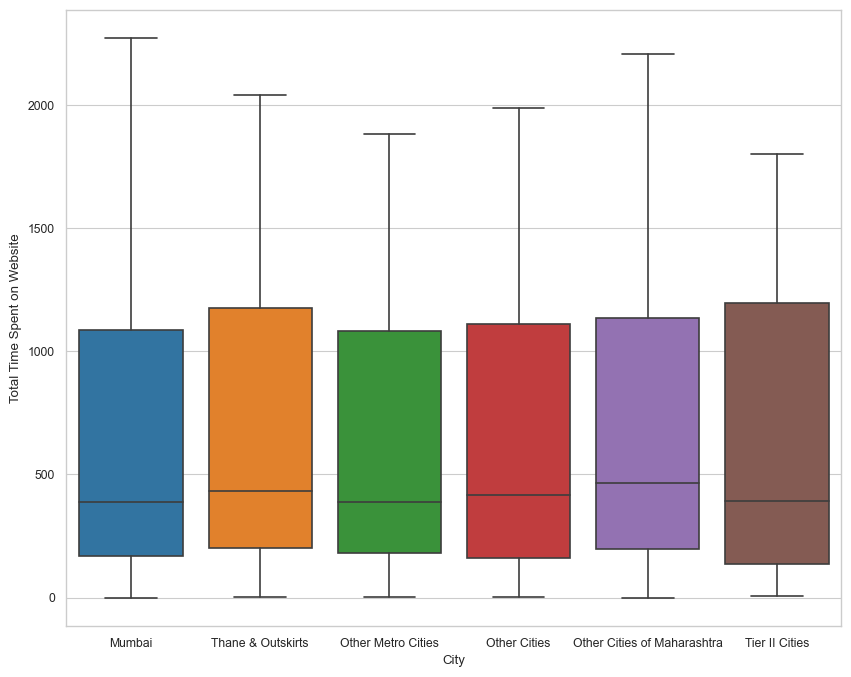

Boxplot Total Time Spent on Website Vs A free copy of Mastering The Interview


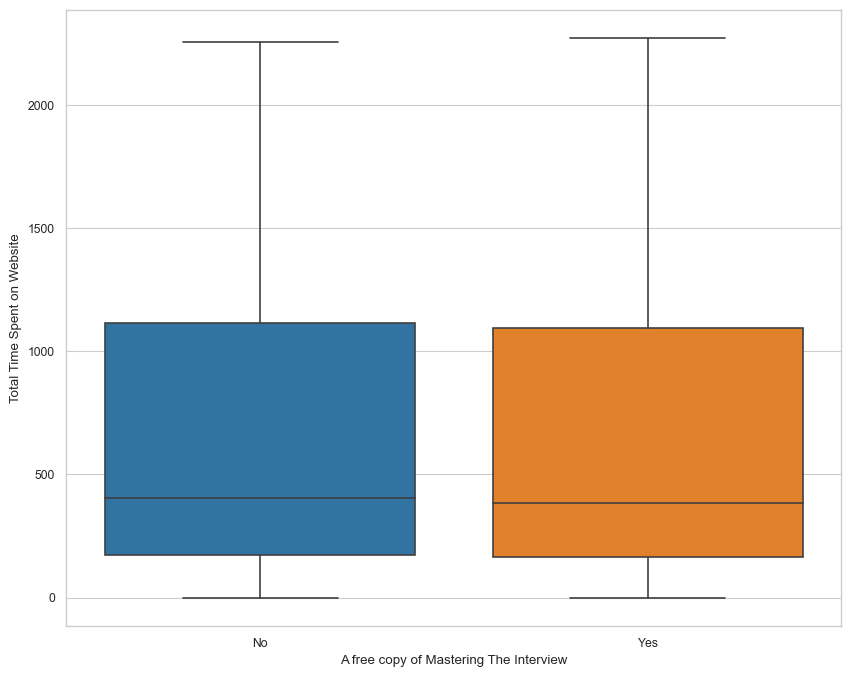

Boxplot Total Time Spent on Website Vs Last Notable Activity


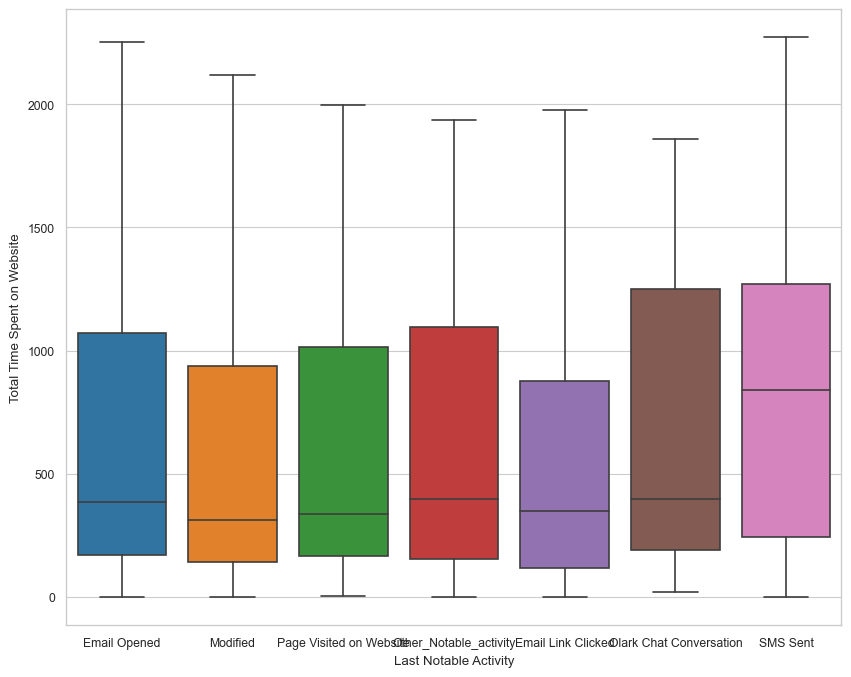

Boxplot Page Views Per Visit Vs Lead Origin


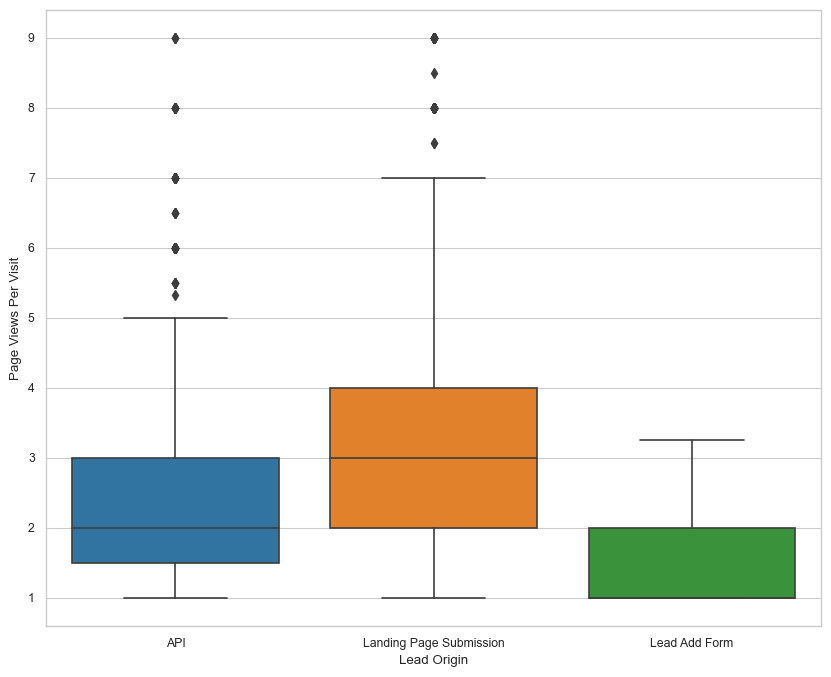

Boxplot Page Views Per Visit Vs Lead Source


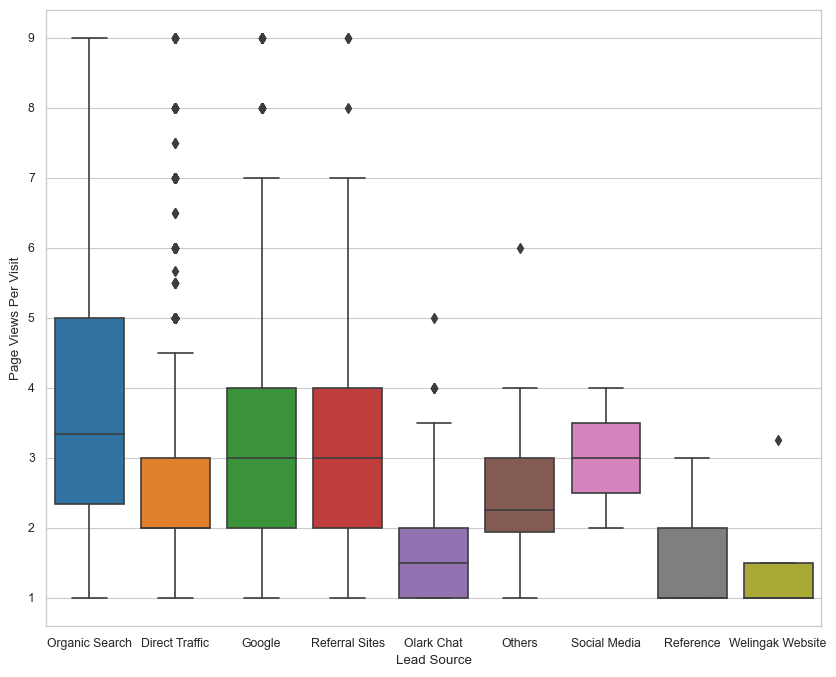

Boxplot Page Views Per Visit Vs Do Not Email


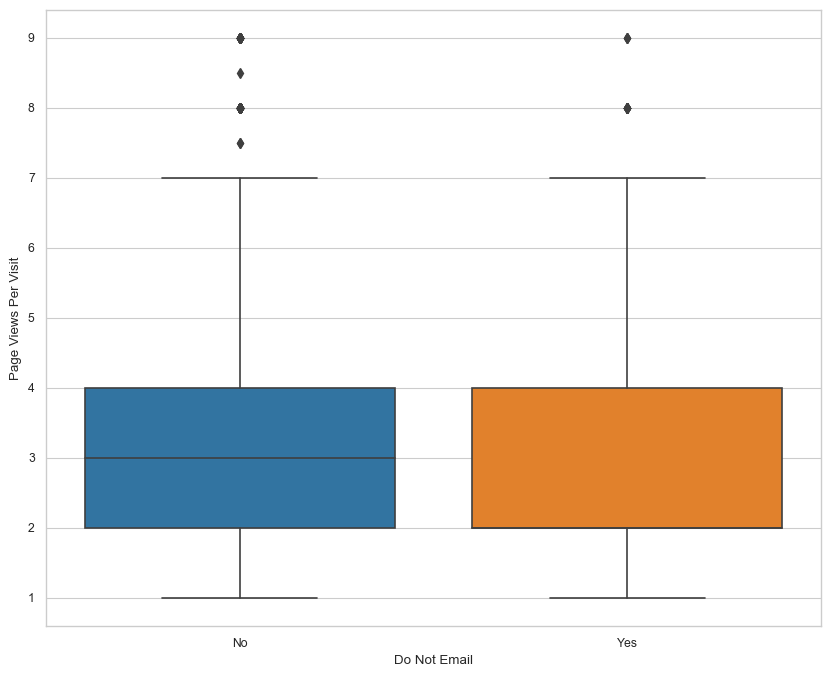

Boxplot Page Views Per Visit Vs Do Not Call


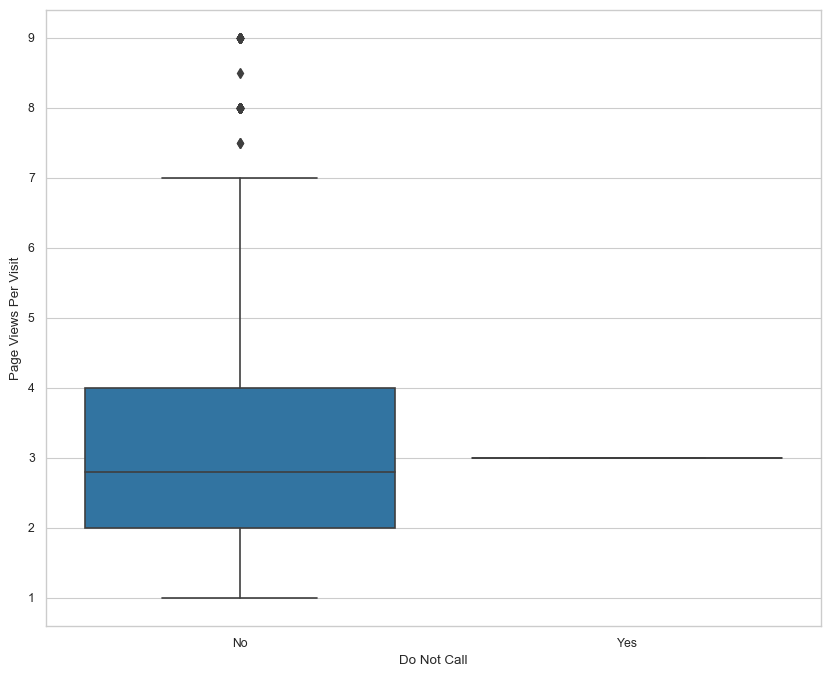

Boxplot Page Views Per Visit Vs Last Activity


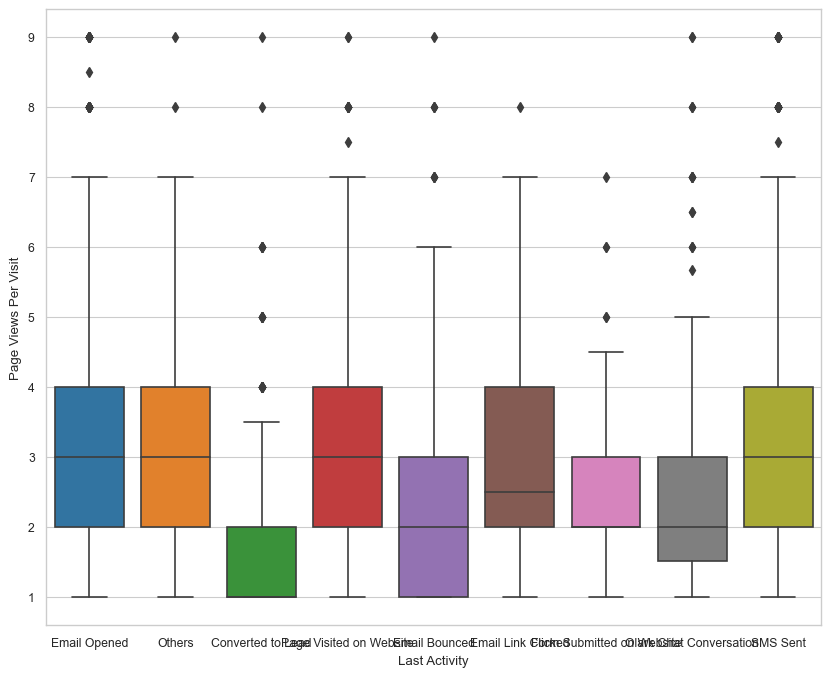

Boxplot Page Views Per Visit Vs Specialization


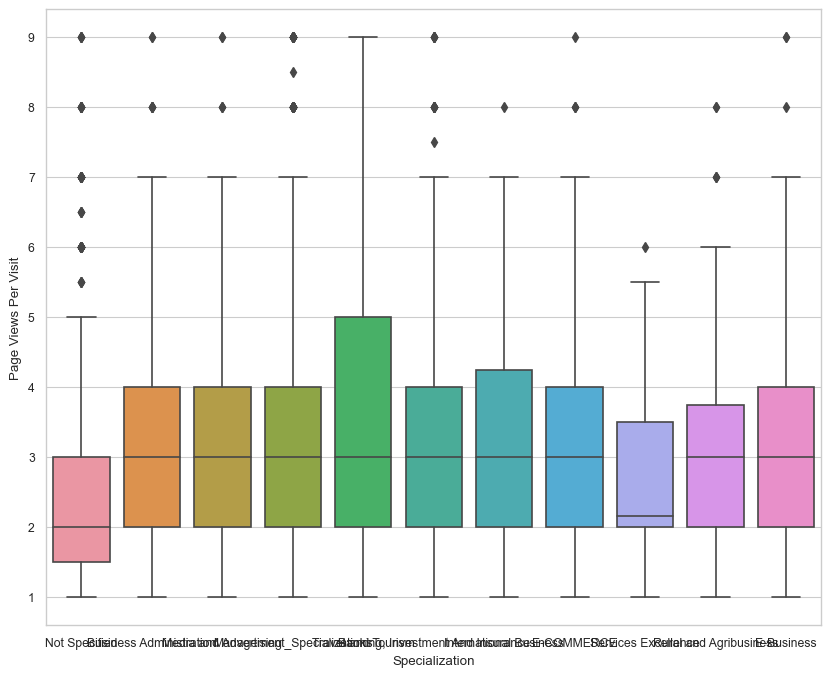

Boxplot Page Views Per Visit Vs What is your current occupation


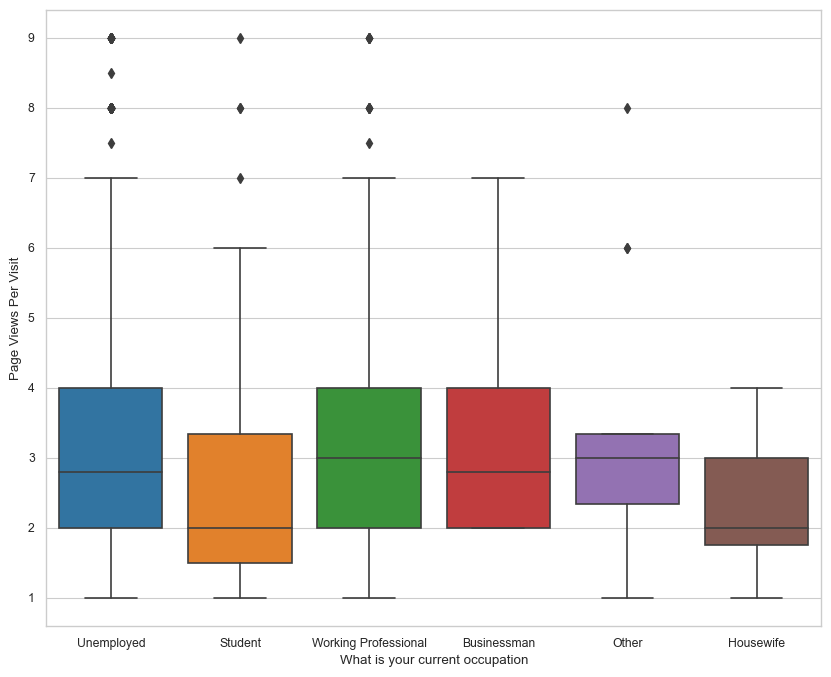

Boxplot Page Views Per Visit Vs Lead Profile


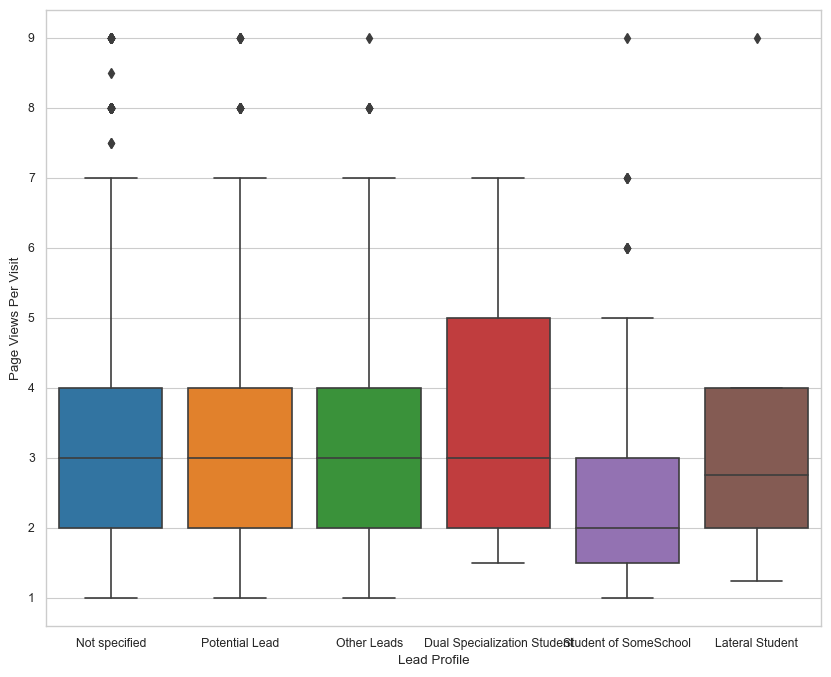

Boxplot Page Views Per Visit Vs City


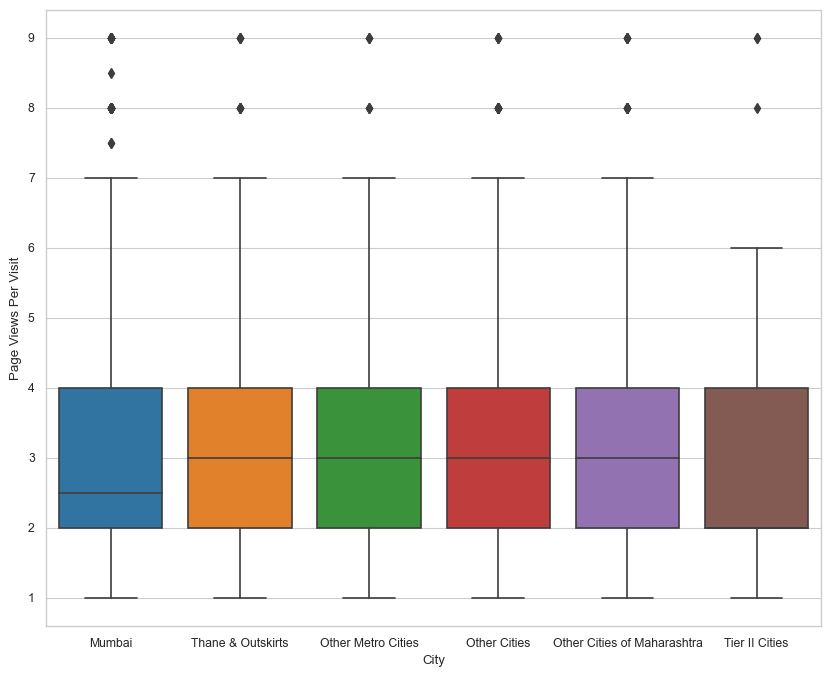

Boxplot Page Views Per Visit Vs A free copy of Mastering The Interview


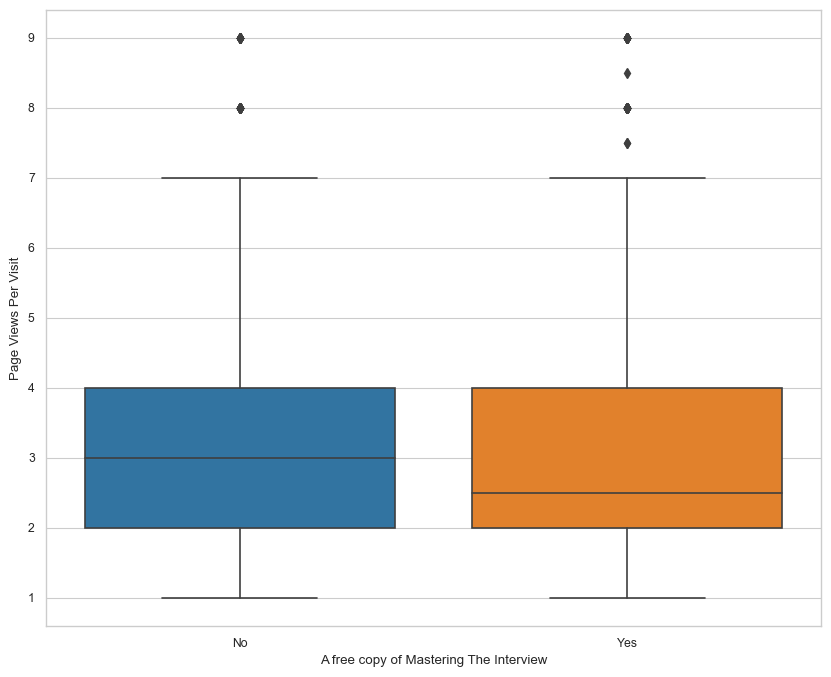

Boxplot Page Views Per Visit Vs Last Notable Activity


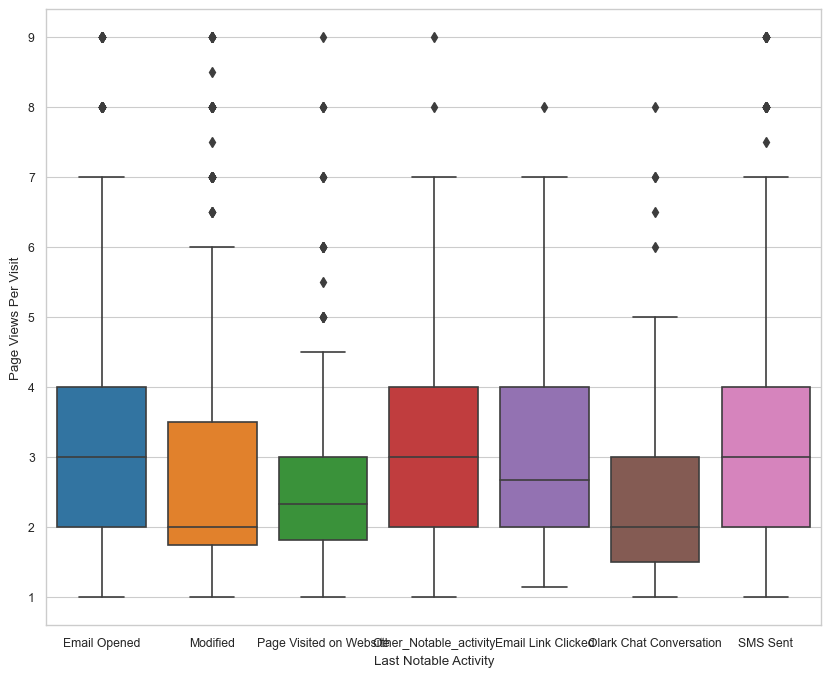

In [654]:
for i in cont_cols:
    for j in cat_cols:
        plt.figure(figsize=(10,8))
        print("Boxplot",i,"Vs",j)
        sns.boxplot(leads[j],leads[i])
        plt.show()

# Multivariate Analysis

<Axes: >

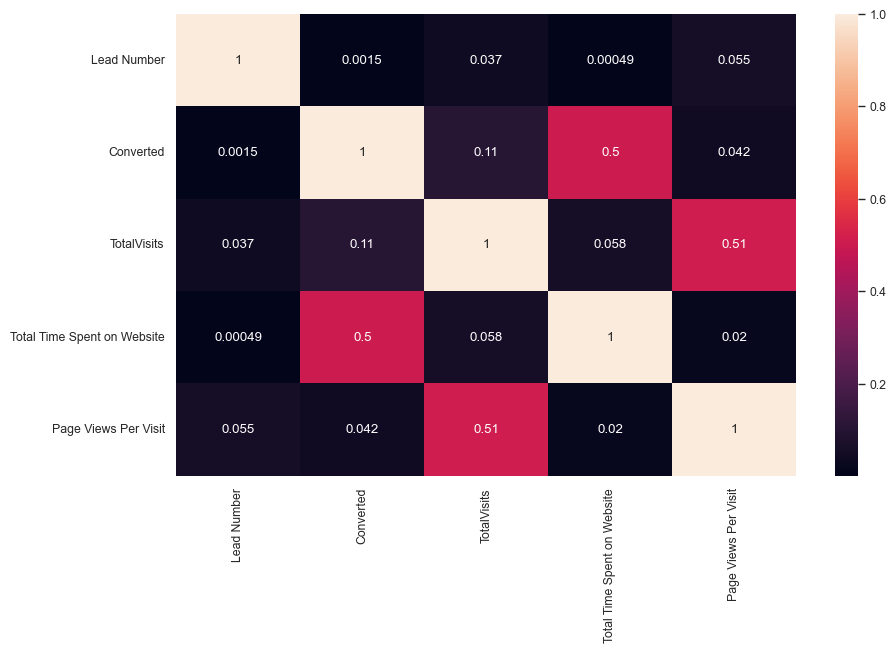

In [655]:
plt.figure(figsize=(10,6))
sns.heatmap(leads.corr(),annot=True)

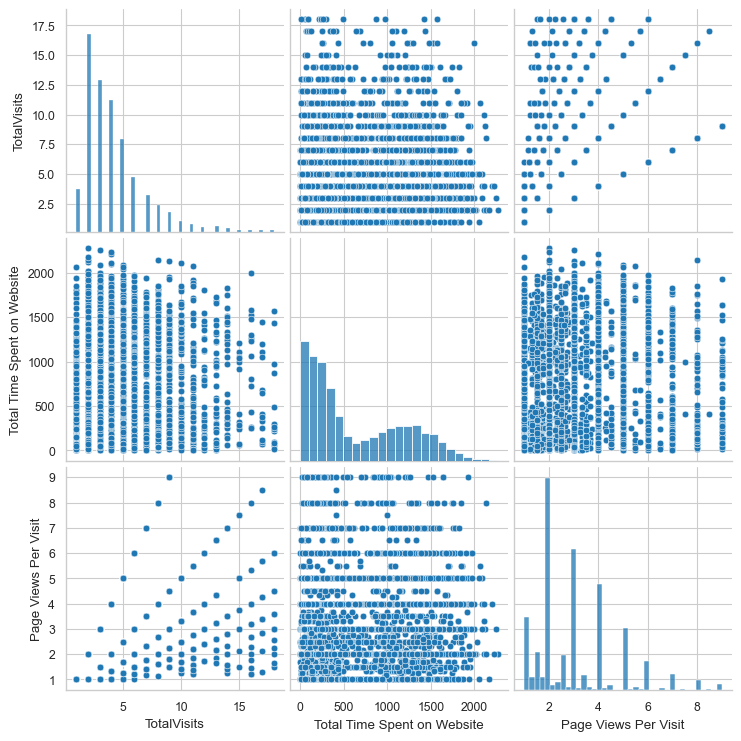

In [656]:
sns.pairplot(leads[cont_cols])

In [657]:
leads.drop(id_cols,axis=1,inplace=True)

cols_to_drop=[]
cols_to_drop=cols_to_drop.append("Do Not Call","Country","What matters most to you in choosing a course","Search","Magazine","Newspaper Article", "X Education Forums"
,"Newspaper"
,"Digital Advertisement"
,"Through Recommendations" 
,"Receive More Updates About Our Courses"
,"Get updates on DM Content", "I agree to pay the amount through cheque" )

In [658]:
leads = leads.drop(['Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations',"Receive More Updates About Our Courses"
,"Get updates on DM Content", "I agree to pay the amount through cheque","Magazine","Country","What matters most to you in choosing a course"],1)

leads.drop(id_cols,axis=1,inplace=True)

In [659]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6640 entries, 1 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6640 non-null   object 
 1   Lead Source                             6640 non-null   object 
 2   Do Not Email                            6640 non-null   object 
 3   Do Not Call                             6640 non-null   object 
 4   Converted                               6640 non-null   int64  
 5   TotalVisits                             6640 non-null   float64
 6   Total Time Spent on Website             6640 non-null   int64  
 7   Page Views Per Visit                    6640 non-null   float64
 8   Last Activity                           6640 non-null   object 
 9   Specialization                          6640 non-null   object 
 10  What is your current occupation         6640 non-null   obje

In [660]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [661]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [662]:
cont_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [663]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [664]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not Specified,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,...,0,0,0,0,0,0,0,0,0,0
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,Management_Specializations,...,0,0,0,0,0,1,0,0,0,0


In [665]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [666]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [667]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [668]:
dummy = pd.get_dummies(leads['Lead Profile'], prefix  = 'Lead Source')

leads = pd.concat([leads, dummy], axis = 1)

In [669]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Dual Specialization Student,Lead Source_Lateral Student,Lead Source_Not specified,Lead Source_Other Leads,Lead Source_Potential Lead,Lead Source_Student of SomeSchool
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not Specified,...,0,0,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,1,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,...,0,0,0,0,0,0,1,0,0,0
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,Management_Specializations,...,0,0,0,0,0,0,0,0,1,0


In [670]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [671]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Dual Specialization Student,Lead Source_Lateral Student,Lead Source_Not specified,Lead Source_Other Leads,Lead Source_Potential Lead,Lead Source_Student of SomeSchool
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1.0,305,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,1,2.0,1640,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# Train-Test Split & Logistic Regression Model Building

In [672]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [673]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [674]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 1979 to 7849
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           4648 non-null   float64
 1   Total Time Spent on Website                           4648 non-null   int64  
 2   Page Views Per Visit                                  4648 non-null   float64
 3   Lead Origin_Landing Page Submission                   4648 non-null   uint8  
 4   Lead Origin_Lead Add Form                             4648 non-null   uint8  
 5   What is your current occupation_Housewife             4648 non-null   uint8  
 6   What is your current occupation_Other                 4648 non-null   uint8  
 7   What is your current occupation_Student               4648 non-null   uint8  
 8   What is your current occupation_Unemployed            4

# Scaling 

In [675]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Dual Specialization Student,Lead Source_Lateral Student,Lead Source_Not specified,Lead Source_Other Leads,Lead Source_Potential Lead,Lead Source_Student of SomeSchool
1979,0.668033,1.836717,1.846001,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
6249,1.418399,1.230405,-0.225650,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5557,1.793583,1.857051,3.712353,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7865,1.793583,-0.645835,3.712353,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8491,-0.082334,0.086176,0.601766,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [676]:
num_cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [677]:
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Dual Specialization Student,Lead Source_Lateral Student,Lead Source_Not specified,Lead Source_Other Leads,Lead Source_Potential Lead,Lead Source_Student of SomeSchool
1979,0.668033,1.836717,1.846001,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
6249,1.418399,1.230405,-0.225650,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5557,1.793583,1.857051,3.712353,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7865,1.793583,-0.645835,3.712353,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8491,-0.082334,0.086176,0.601766,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8449,0.292850,0.771974,-0.331410,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
100,1.043216,1.849657,0.290707,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5371,-0.832700,0.572335,-0.642469,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8348,-0.457517,-0.067250,-0.020351,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# Model Building using Stats Model & RFE:

In [678]:
import statsmodels.api as sm

In [679]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=20)             # running RFE with 16 variables as output
rfe = rfe.fit(X_train, y_train)

In [680]:
rfe.support_

array([False,  True, False, False,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True,  True,
       False, False,  True, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True, False,  True,  True])

# Feature Selection

In [681]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 29),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 26),
 ('City_Other Cities of Maharashtra', False, 33),
 ('City_Other Metro Cities', False, 24),
 ('City_Thane & Outskirts', False, 30),
 ('City_Tier II Cities', False, 14),
 ('Specialization_Banking, Investment And Insurance', False, 8),
 ('Specialization_Business Administration', False, 10),
 ('Specialization_E-Business', False, 6),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_International Business', False, 20),
 ('Specialization_Management_Specializatio

In [682]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_E-COMMERCE', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Lead Source_Dual Specialization Student',
       'Lead Source_Lateral Student', 'Lead Source_Not specified',
       'Lead Source_Potential Lead', 'Lead Source_Student of SomeSchool'],
      dtype='object')

In [683]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission',
       'What is your current occupation_Other', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Olark Chat Conversation',
     

In [684]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4627
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1836.9
Date:                Thu, 01 Jun 2023   Deviance:                       3673.8
Time:                        22:48:05   Pearson chi2:                 4.67e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4054
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4531      0.652      0.695      0.487      -0.826       1.732
Total Time Spent on Website                              1.1195      0.043     25.737      0.000       1.034       1.205
Lead Origin_Lead Add Form                               25.0271   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
What is your current occupation_Housewife               23.8898   4.04e+04      0.001      1.000   -7.92e+04    7.93e+04
What is your current occupation_Student                 -0.8184      0.707     -1.157      0.247      -2.204       0.567
What is your current occupation_Unemployed              -1.4177      0.639     -2.219      0.026      -2.670      -0.165
What is your current occupation_Working Professional     1.4422      0.678      2.127      0.033       0.113       2.771
Specialization_E-COMMERCE                                0.6044      0.351      1.724      0.085      -0.083       1.291
Lead Source_Reference                                   -1.3550   1.35e+05  -1.01e-05      1.000   -2.64e+05    2.64e+05
Lead Source_Welingak Website                             0.3091   1.51e+05   2.04e-06      1.000   -2.96e+05    2.96e+05
Last Notable Activity_Email Opened                      -0.6135      0.251     -2.440      0.015      -1.106      -0.121
Last Notable Activity_Modified                          -0.7715      0.184     -4.194      0.000      -1.132      -0.411
Last Notable Activity_SMS Sent                           0.7040      0.254      2.772      0.006       0.206       1.202
Last Activity_Email Bounced                             -1.4559      0.408     -3.565      0.000      -2.256      -0.656
Last Activity_Email Opened                               0.6872      0.193      3.557      0.000       0.309       1.066
Last Activity_SMS Sent                                   0.8056      0.195      4.122      0.000       0.423       1.189
Lead Source_Dual Specialization Student                 23.6620   3.28e+04      0.001      0.999   -6.42e+04    6.43e+04
Lead Source_Lateral Student                             24.3651   4.23e+04      0.001      1.000   -8.28e+04    8.28e+04
Lead Source_Not specified                               -0.5543      0.177     -3.132      0.002      -0.901      -0.207
Lead Source_Potential Lead                               1.4902      0.199      7.501      0.000       1.101       1.880
Lead Source_Student of SomeSchool                       -2.8926      0.650     -4.448      0.000      -4.167      -1.618
========================================================================================================================
"""

In [685]:
#check variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,What is your current occupation_Unemployed,25.10
1,Lead Origin_Lead Add Form,17.02
17,Lead Source_Not specified,14.55
7,Lead Source_Reference,14.03
9,Last Notable Activity_Email Opened,11.21
11,Last Notable Activity_SMS Sent,8.61
13,Last Activity_Email Opened,8.03
14,Last Activity_SMS Sent,6.35
10,Last Notable Activity_Modified,5.67
8,Lead Source_Welingak Website,4.00


The p value for column 'Lead Origin_Lead Add Form' is very high and above the threshold. Hence we will drop this column from our model

In [686]:
col2 = col.drop('Lead Origin_Lead Add Form',1)
col2

Index(['Total Time Spent on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_E-COMMERCE', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Lead Source_Dual Specialization Student',
       'Lead Source_Lateral Student', 'Lead Source_Not specified',
       'Lead Source_Potential Lead', 'Lead Source_Student of SomeSchool'],
      dtype='object')

In [687]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4628
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1837.8
Date:                Thu, 01 Jun 2023   Deviance:                       3675.7
Time:                        22:48:05   Pearson chi2:                 4.67e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4051
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4506      0.652      0.691      0.490      -0.828       1.729
Total Time Spent on Website                              1.1202      0.043     25.752      0.000       1.035       1.205
What is your current occupation_Housewife               23.8891   4.04e+04      0.001      1.000   -7.92e+04    7.93e+04
What is your current occupation_Student                 -0.8182      0.707     -1.157      0.247      -2.204       0.568
What is your current occupation_Unemployed              -1.4167      0.639     -2.217      0.027      -2.669      -0.164
What is your current occupation_Working Professional     1.4422      0.678      2.127      0.033       0.113       2.771
Specialization_E-COMMERCE                                0.6037      0.351      1.722      0.085      -0.083       1.291
Lead Source_Reference                                   23.6705   3.07e+04      0.001      0.999   -6.02e+04    6.02e+04
Lead Source_Welingak Website                            25.3343   7.56e+04      0.000      1.000   -1.48e+05    1.48e+05
Last Notable Activity_Email Opened                      -0.6104      0.251     -2.428      0.015      -1.103      -0.118
Last Notable Activity_Modified                          -0.7716      0.184     -4.194      0.000      -1.132      -0.411
Last Notable Activity_SMS Sent                           0.7040      0.254      2.772      0.006       0.206       1.202
Last Activity_Email Bounced                             -1.4560      0.408     -3.565      0.000      -2.256      -0.656
Last Activity_Email Opened                               0.6872      0.193      3.557      0.000       0.309       1.066
Last Activity_SMS Sent                                   0.8054      0.195      4.121      0.000       0.422       1.188
Lead Source_Dual Specialization Student                 23.6610   3.28e+04      0.001      0.999   -6.42e+04    6.43e+04
Lead Source_Lateral Student                             24.3644   4.23e+04      0.001      1.000   -8.28e+04    8.29e+04
Lead Source_Not specified                               -0.5524      0.177     -3.121      0.002      -0.899      -0.206
Lead Source_Potential Lead                               1.4907      0.199      7.503      0.000       1.101       1.880
Lead Source_Student of SomeSchool                       -2.8931      0.650     -4.449      0.000      -4.168      -1.618
========================================================================================================================
"""

In [688]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,25.10
16,Lead Source_Not specified,14.55
8,Last Notable Activity_Email Opened,11.21
10,Last Notable Activity_SMS Sent,8.61
12,Last Activity_Email Opened,8.03
13,Last Activity_SMS Sent,6.35
9,Last Notable Activity_Modified,5.67
17,Lead Source_Potential Lead,3.91
4,What is your current occupation_Working Profes...,2.85
2,What is your current occupation_Student,1.69


The p value for column 'Lead Source_Welingak Website' is very high and above the threshold. Hence we will drop this column from our model

In [689]:
col3 = col2.drop('Lead Source_Welingak Website',1)
col3

Index(['Total Time Spent on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_E-COMMERCE', 'Lead Source_Reference',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Lead Source_Dual Specialization Student',
       'Lead Source_Lateral Student', 'Lead Source_Not specified',
       'Lead Source_Potential Lead', 'Lead Source_Student of SomeSchool'],
      dtype='object')

In [690]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4629
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1841.3
Date:                Thu, 01 Jun 2023   Deviance:                       3682.5
Time:                        22:48:05   Pearson chi2:                 4.67e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4042
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4580      0.653      0.702      0.483      -0.821       1.737
Total Time Spent on Website                              1.1215      0.043     25.789      0.000       1.036       1.207
What is your current occupation_Housewife               23.8894   4.04e+04      0.001      1.000   -7.92e+04    7.93e+04
What is your current occupation_Student                 -0.8177      0.707     -1.156      0.248      -2.204       0.569
What is your current occupation_Unemployed              -1.4139      0.639     -2.211      0.027      -2.667      -0.161
What is your current occupation_Working Professional     1.4416      0.678      2.125      0.034       0.112       2.771
Specialization_E-COMMERCE                                0.6016      0.350      1.717      0.086      -0.085       1.288
Lead Source_Reference                                   23.6662   3.07e+04      0.001      0.999   -6.02e+04    6.02e+04
Last Notable Activity_Email Opened                      -0.6380      0.251     -2.546      0.011      -1.129      -0.147
Last Notable Activity_Modified                          -0.7856      0.183     -4.282      0.000      -1.145      -0.426
Last Notable Activity_SMS Sent                           0.6901      0.254      2.721      0.007       0.193       1.187
Last Activity_Email Bounced                             -1.4610      0.408     -3.577      0.000      -2.261      -0.660
Last Activity_Email Opened                               0.7040      0.193      3.656      0.000       0.327       1.081
Last Activity_SMS Sent                                   0.8043      0.195      4.116      0.000       0.421       1.187
Lead Source_Dual Specialization Student                 23.6620   3.28e+04      0.001      0.999   -6.42e+04    6.43e+04
Lead Source_Lateral Student                             24.3624   4.23e+04      0.001      1.000   -8.28e+04    8.28e+04
Lead Source_Not specified                               -0.5470      0.177     -3.090      0.002      -0.894      -0.200
Lead Source_Potential Lead                               1.4905      0.199      7.501      0.000       1.101       1.880
Lead Source_Student of SomeSchool                       -2.8955      0.650     -4.452      0.000      -4.170      -1.621
========================================================================================================================
"""

In [691]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,25.10
15,Lead Source_Not specified,14.55
7,Last Notable Activity_Email Opened,11.20
9,Last Notable Activity_SMS Sent,8.61
11,Last Activity_Email Opened,8.03
12,Last Activity_SMS Sent,6.35
8,Last Notable Activity_Modified,5.67
16,Lead Source_Potential Lead,3.91
4,What is your current occupation_Working Profes...,2.85
2,What is your current occupation_Student,1.69


In [692]:
col4 = col3.drop('Lead Source_Reference',1)
col4

Index(['Total Time Spent on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_E-COMMERCE', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Lead Source_Dual Specialization Student',
       'Lead Source_Lateral Student', 'Lead Source_Not specified',
       'Lead Source_Potential Lead', 'Lead Source_Student of SomeSchool'],
      dtype='object')

In [693]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col4])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4630
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1845.3
Date:                Thu, 01 Jun 2023   Deviance:                       3690.7
Time:                        22:48:06   Pearson chi2:                 4.69e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4032
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4577      0.653      0.701      0.483      -0.822       1.737
Total Time Spent on Website                              1.1258      0.043     25.913      0.000       1.041       1.211
What is your current occupation_Housewife               23.0321   2.52e+04      0.001      0.999   -4.93e+04    4.93e+04
What is your current occupation_Student                 -0.8092      0.707     -1.144      0.253      -2.196       0.577
What is your current occupation_Unemployed              -1.4092      0.640     -2.203      0.028      -2.663      -0.155
What is your current occupation_Working Professional     1.4587      0.678      2.150      0.032       0.129       2.788
Specialization_E-COMMERCE                                0.6037      0.349      1.727      0.084      -0.081       1.289
Last Notable Activity_Email Opened                      -0.6313      0.250     -2.524      0.012      -1.122      -0.141
Last Notable Activity_Modified                          -0.7855      0.183     -4.298      0.000      -1.144      -0.427
Last Notable Activity_SMS Sent                           0.6922      0.253      2.733      0.006       0.196       1.189
Last Activity_Email Bounced                             -1.4730      0.409     -3.605      0.000      -2.274      -0.672
Last Activity_Email Opened                               0.6935      0.192      3.603      0.000       0.316       1.071
Last Activity_SMS Sent                                   0.7934      0.195      4.062      0.000       0.411       1.176
Lead Source_Dual Specialization Student                 22.6568   1.99e+04      0.001      0.999   -3.89e+04    3.89e+04
Lead Source_Lateral Student                             23.3613   2.56e+04      0.001      0.999   -5.02e+04    5.02e+04
Lead Source_Not specified                               -0.5418      0.177     -3.063      0.002      -0.889      -0.195
Lead Source_Potential Lead                               1.4945      0.199      7.523      0.000       1.105       1.884
Lead Source_Student of SomeSchool                       -2.9021      0.651     -4.461      0.000      -4.177      -1.627
========================================================================================================================
"""

In [694]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,25.09
14,Lead Source_Not specified,14.55
6,Last Notable Activity_Email Opened,11.19
8,Last Notable Activity_SMS Sent,8.60
10,Last Activity_Email Opened,8.03
11,Last Activity_SMS Sent,6.35
7,Last Notable Activity_Modified,5.66
15,Lead Source_Potential Lead,3.91
4,What is your current occupation_Working Profes...,2.84
2,What is your current occupation_Student,1.69


In [695]:
col5 = col4.drop('What is your current occupation_Housewife',1)
col5

Index(['Total Time Spent on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_E-COMMERCE', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Lead Source_Dual Specialization Student',
       'Lead Source_Lateral Student', 'Lead Source_Not specified',
       'Lead Source_Potential Lead', 'Lead Source_Student of SomeSchool'],
      dtype='object')

In [696]:
#BUILDING MODEL #5
X_train_sm = sm.add_constant(X_train[col5])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4631
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1847.9
Date:                Thu, 01 Jun 2023   Deviance:                       3695.8
Time:                        22:48:06   Pearson chi2:                 4.70e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4025
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0928      0.598      1.826      0.068      -0.080       2.266
Total Time Spent on Website                              1.1243      0.043     25.895      0.000       1.039       1.209
What is your current occupation_Student                 -1.4558      0.657     -2.214      0.027      -2.744      -0.167
What is your current occupation_Unemployed              -2.0556      0.584     -3.518      0.000      -3.201      -0.910
What is your current occupation_Working Professional     0.8122      0.626      1.297      0.195      -0.415       2.039
Specialization_E-COMMERCE                                0.6006      0.350      1.717      0.086      -0.085       1.286
Last Notable Activity_Email Opened                      -0.6317      0.250     -2.529      0.011      -1.121      -0.142
Last Notable Activity_Modified                          -0.7814      0.183     -4.276      0.000      -1.140      -0.423
Last Notable Activity_SMS Sent                           0.6962      0.253      2.750      0.006       0.200       1.193
Last Activity_Email Bounced                             -1.4708      0.408     -3.601      0.000      -2.271      -0.670
Last Activity_Email Opened                               0.6989      0.192      3.639      0.000       0.323       1.075
Last Activity_SMS Sent                                   0.7932      0.195      4.062      0.000       0.410       1.176
Lead Source_Dual Specialization Student                 22.6642   1.99e+04      0.001      0.999   -3.89e+04     3.9e+04
Lead Source_Lateral Student                             23.3668   2.56e+04      0.001      0.999   -5.02e+04    5.02e+04
Lead Source_Not specified                               -0.5343      0.177     -3.024      0.002      -0.881      -0.188
Lead Source_Potential Lead                               1.5024      0.198      7.573      0.000       1.114       1.891
Lead Source_Student of SomeSchool                       -2.8935      0.650     -4.449      0.000      -4.168      -1.619
========================================================================================================================
"""

In [697]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,25.09
14,Lead Source_Not specified,14.55
6,Last Notable Activity_Email Opened,11.19
8,Last Notable Activity_SMS Sent,8.60
10,Last Activity_Email Opened,8.03
11,Last Activity_SMS Sent,6.35
7,Last Notable Activity_Modified,5.66
15,Lead Source_Potential Lead,3.91
4,What is your current occupation_Working Profes...,2.84
2,What is your current occupation_Student,1.69


In [698]:
col6 = col5.drop('Lead Source_Dual Specialization Student',1)
col6

Index(['Total Time Spent on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_E-COMMERCE', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Lead Source_Lateral Student',
       'Lead Source_Not specified', 'Lead Source_Potential Lead',
       'Lead Source_Student of SomeSchool'],
      dtype='object')

In [699]:
#BUILDING MODEL #6
X_train_sm = sm.add_constant(X_train[col6])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4632
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1852.3
Date:                Thu, 01 Jun 2023   Deviance:                       3704.5
Time:                        22:48:06   Pearson chi2:                 4.72e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4014
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1309      0.598      1.892      0.059      -0.041       2.303
Total Time Spent on Website                              1.1271      0.043     25.955      0.000       1.042       1.212
What is your current occupation_Student                 -1.3805      0.655     -2.108      0.035      -2.664      -0.097
What is your current occupation_Unemployed              -2.0108      0.583     -3.447      0.001      -3.154      -0.867
What is your current occupation_Working Professional     0.8690      0.625      1.390      0.164      -0.356       2.094
Specialization_E-COMMERCE                                0.6019      0.350      1.720      0.085      -0.084       1.288
Last Notable Activity_Email Opened                      -0.6281      0.250     -2.513      0.012      -1.118      -0.138
Last Notable Activity_Modified                          -0.7865      0.183     -4.302      0.000      -1.145      -0.428
Last Notable Activity_SMS Sent                           0.6961      0.253      2.748      0.006       0.200       1.193
Last Activity_Email Bounced                             -1.4699      0.409     -3.598      0.000      -2.271      -0.669
Last Activity_Email Opened                               0.7052      0.192      3.670      0.000       0.329       1.082
Last Activity_SMS Sent                                   0.8017      0.195      4.102      0.000       0.419       1.185
Lead Source_Lateral Student                             22.2738   1.55e+04      0.001      0.999   -3.04e+04    3.04e+04
Lead Source_Not specified                               -0.6242      0.171     -3.644      0.000      -0.960      -0.288
Lead Source_Potential Lead                               1.4137      0.194      7.301      0.000       1.034       1.793
Lead Source_Student of SomeSchool                       -2.9972      0.649     -4.617      0.000      -4.270      -1.725
========================================================================================================================
"""

In [700]:
col7 = col6.drop('Lead Source_Lateral Student',1)
col7

Index(['Total Time Spent on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_E-COMMERCE', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Lead Source_Not specified',
       'Lead Source_Potential Lead', 'Lead Source_Student of SomeSchool'],
      dtype='object')

In [701]:
#BUILDING MODEL #7
X_train_sm = sm.add_constant(X_train[col7])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4633
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1855.8
Date:                Thu, 01 Jun 2023   Deviance:                       3711.7
Time:                        22:48:07   Pearson chi2:                 4.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4005
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1547      0.598      1.932      0.053      -0.017       2.326
Total Time Spent on Website                              1.1280      0.043     25.993      0.000       1.043       1.213
What is your current occupation_Student                 -1.3551      0.655     -2.070      0.038      -2.638      -0.072
What is your current occupation_Unemployed              -1.9798      0.583     -3.397      0.001      -3.122      -0.837
What is your current occupation_Working Professional     0.9009      0.625      1.442      0.149      -0.323       2.125
Specialization_E-COMMERCE                                0.6023      0.350      1.721      0.085      -0.084       1.288
Last Notable Activity_Email Opened                      -0.6396      0.249     -2.565      0.010      -1.128      -0.151
Last Notable Activity_Modified                          -0.7885      0.183     -4.312      0.000      -1.147      -0.430
Last Notable Activity_SMS Sent                           0.6956      0.253      2.745      0.006       0.199       1.192
Last Activity_Email Bounced                             -1.4680      0.408     -3.594      0.000      -2.268      -0.667
Last Activity_Email Opened                               0.7233      0.192      3.777      0.000       0.348       1.099
Last Activity_SMS Sent                                   0.8069      0.196      4.127      0.000       0.424       1.190
Lead Source_Not specified                               -0.6839      0.168     -4.060      0.000      -1.014      -0.354
Lead Source_Potential Lead                               1.3541      0.191      7.089      0.000       0.980       1.729
Lead Source_Student of SomeSchool                       -3.0551      0.648     -4.711      0.000      -4.326      -1.784
========================================================================================================================
"""

In [702]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col7].values, i) for i in range(X_train[col7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,What is your current occupation_Unemployed,23.60
11,Lead Source_Not specified,13.58
5,Last Notable Activity_Email Opened,11.14
7,Last Notable Activity_SMS Sent,8.55
9,Last Activity_Email Opened,8.01
10,Last Activity_SMS Sent,6.35
6,Last Notable Activity_Modified,5.59
12,Lead Source_Potential Lead,3.67
3,What is your current occupation_Working Profes...,2.68
1,What is your current occupation_Student,1.65


In [703]:
col8 = col7.drop('What is your current occupation_Working Professional',1)
col8

Index(['Total Time Spent on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Specialization_E-COMMERCE', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Lead Source_Not specified',
       'Lead Source_Potential Lead', 'Lead Source_Student of SomeSchool'],
      dtype='object')

In [704]:
#BUILDING MODEL #8
X_train_sm = sm.add_constant(X_train[col8])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4634
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1856.8
Date:                Thu, 01 Jun 2023   Deviance:                       3713.6
Time:                        22:48:07   Pearson chi2:                 4.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4002
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.9288      0.290      6.657      0.000       1.361       2.497
Total Time Spent on Website                    1.1279      0.043     25.993      0.000       1.043       1.213
What is your current occupation_Student       -2.1500      0.371     -5.795      0.000      -2.877      -1.423
What is your current occupation_Unemployed    -2.7757      0.219    -12.672      0.000      -3.205      -2.346
Specialization_E-COMMERCE                      0.6047      0.350      1.728      0.084      -0.081       1.290
Last Notable Activity_Email Opened            -0.6403      0.249     -2.567      0.010      -1.129      -0.151
Last Notable Activity_Modified                -0.7912      0.183     -4.327      0.000      -1.150      -0.433
Last Notable Activity_SMS Sent                 0.6934      0.253      2.737      0.006       0.197       1.190
Last Activity_Email Bounced                   -1.4593      0.408     -3.580      0.000      -2.258      -0.660
Last Activity_Email Opened                     0.7240      0.192      3.777      0.000       0.348       1.100
Last Activity_SMS Sent                         0.8102      0.195      4.145      0.000       0.427       1.193
Lead Source_Not specified                     -0.6604      0.168     -3.928      0.000      -0.990      -0.331
Lead Source_Potential Lead                     1.3769      0.191      7.213      0.000       1.003       1.751
Lead Source_Student of SomeSchool             -3.0335      0.648     -4.678      0.000      -4.304      -1.763
==============================================================================================================
"""

In [705]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col8].columns
vif['VIF'] = [variance_inflation_factor(X_train[col8].values, i) for i in range(X_train[col8].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,What is your current occupation_Unemployed,10.13
4,Last Notable Activity_Email Opened,10.05
10,Lead Source_Not specified,9.33
8,Last Activity_Email Opened,8.01
6,Last Notable Activity_SMS Sent,7.70
9,Last Activity_SMS Sent,6.34
5,Last Notable Activity_Modified,4.60
11,Lead Source_Potential Lead,2.52
12,Lead Source_Student of SomeSchool,1.36
1,What is your current occupation_Student,1.31


In [706]:
col9 = col8.drop('Specialization_E-COMMERCE',1)
col9

Index(['Total Time Spent on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Lead Source_Not specified', 'Lead Source_Potential Lead',
       'Lead Source_Student of SomeSchool'],
      dtype='object')

In [707]:
#BUILDING MODEL #9
X_train_sm = sm.add_constant(X_train[col9])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4635
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1858.2
Date:                Thu, 01 Jun 2023   Deviance:                       3716.5
Time:                        22:48:07   Pearson chi2:                 4.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3999
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.9293      0.290      6.656      0.000       1.361       2.497
Total Time Spent on Website                    1.1241      0.043     25.972      0.000       1.039       1.209
What is your current occupation_Student       -2.1603      0.371     -5.824      0.000      -2.887      -1.433
What is your current occupation_Unemployed    -2.7777      0.219    -12.667      0.000      -3.207      -2.348
Last Notable Activity_Email Opened            -0.6267      0.249     -2.514      0.012      -1.115      -0.138
Last Notable Activity_Modified                -0.7808      0.183     -4.274      0.000      -1.139      -0.423
Last Notable Activity_SMS Sent                 0.7026      0.253      2.773      0.006       0.206       1.199
Last Activity_Email Bounced                   -1.4668      0.408     -3.599      0.000      -2.266      -0.668
Last Activity_Email Opened                     0.7128      0.191      3.723      0.000       0.338       1.088
Last Activity_SMS Sent                         0.8042      0.195      4.115      0.000       0.421       1.187
Lead Source_Not specified                     -0.6527      0.168     -3.886      0.000      -0.982      -0.324
Lead Source_Potential Lead                     1.3829      0.191      7.249      0.000       1.009       1.757
Lead Source_Student of SomeSchool             -3.0239      0.648     -4.664      0.000      -4.295      -1.753
==============================================================================================================
"""

In [708]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col9].columns
vif['VIF'] = [variance_inflation_factor(X_train[col9].values, i) for i in range(X_train[col9].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,What is your current occupation_Unemployed,10.13
3,Last Notable Activity_Email Opened,10.04
9,Lead Source_Not specified,9.33
7,Last Activity_Email Opened,8.00
5,Last Notable Activity_SMS Sent,7.70
8,Last Activity_SMS Sent,6.34
4,Last Notable Activity_Modified,4.60
10,Lead Source_Potential Lead,2.52
11,Lead Source_Student of SomeSchool,1.35
1,What is your current occupation_Student,1.31


In [709]:
col10 = col9.drop('Last Notable Activity_Email Opened',1)
col10

Index(['Total Time Spent on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Lead Source_Not specified',
       'Lead Source_Potential Lead', 'Lead Source_Student of SomeSchool'],
      dtype='object')

In [710]:
#BUILDING MODEL #10
X_train_sm = sm.add_constant(X_train[col10])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4636
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1861.4
Date:                Thu, 01 Jun 2023   Deviance:                       3722.7
Time:                        22:48:07   Pearson chi2:                 4.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3991
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.6943      0.274      6.173      0.000       1.156       2.232
Total Time Spent on Website                    1.1244      0.043     26.012      0.000       1.040       1.209
What is your current occupation_Student       -2.1695      0.370     -5.856      0.000      -2.896      -1.443
What is your current occupation_Unemployed    -2.7744      0.219    -12.651      0.000      -3.204      -2.345
Last Notable Activity_Modified                -0.4469      0.127     -3.530      0.000      -0.695      -0.199
Last Notable Activity_SMS Sent                 1.0373      0.216      4.791      0.000       0.613       1.462
Last Activity_Email Bounced                   -1.4826      0.405     -3.662      0.000      -2.276      -0.689
Last Activity_Email Opened                     0.3484      0.127      2.753      0.006       0.100       0.596
Last Activity_SMS Sent                         0.6830      0.188      3.631      0.000       0.314       1.052
Lead Source_Not specified                     -0.6352      0.167     -3.793      0.000      -0.963      -0.307
Lead Source_Potential Lead                     1.4142      0.190      7.436      0.000       1.041       1.787
Lead Source_Student of SomeSchool             -2.9882      0.648     -4.615      0.000      -4.257      -1.719
==============================================================================================================
"""

In [711]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col10].columns
vif['VIF'] = [variance_inflation_factor(X_train[col10].values, i) for i in range(X_train[col10].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,What is your current occupation_Unemployed,9.56
8,Lead Source_Not specified,8.92
4,Last Notable Activity_SMS Sent,6.44
7,Last Activity_SMS Sent,6.11
6,Last Activity_Email Opened,2.95
3,Last Notable Activity_Modified,2.68
9,Lead Source_Potential Lead,2.43
10,Lead Source_Student of SomeSchool,1.34
1,What is your current occupation_Student,1.30
5,Last Activity_Email Bounced,1.15


In [712]:
col11 = col10.drop('Lead Source_Not specified',1)
col11

Index(['Total Time Spent on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Lead Source_Potential Lead',
       'Lead Source_Student of SomeSchool'],
      dtype='object')

In [713]:
#BUILDING MODEL #11
X_train_sm = sm.add_constant(X_train[col11])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4637
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1868.3
Date:                Thu, 01 Jun 2023   Deviance:                       3736.7
Time:                        22:48:07   Pearson chi2:                 4.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3973
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.1968      0.239      5.016      0.000       0.729       1.664
Total Time Spent on Website                    1.1248      0.043     26.085      0.000       1.040       1.209
What is your current occupation_Student       -2.2048      0.370     -5.956      0.000      -2.930      -1.479
What is your current occupation_Unemployed    -2.8417      0.219    -12.998      0.000      -3.270      -2.413
Last Notable Activity_Modified                -0.4528      0.126     -3.590      0.000      -0.700      -0.206
Last Notable Activity_SMS Sent                 1.0265      0.216      4.754      0.000       0.603       1.450
Last Activity_Email Bounced                   -1.5079      0.406     -3.716      0.000      -2.303      -0.713
Last Activity_Email Opened                     0.3425      0.126      2.718      0.007       0.095       0.589
Last Activity_SMS Sent                         0.6387      0.187      3.412      0.001       0.272       1.006
Lead Source_Potential Lead                     1.9929      0.115     17.267      0.000       1.767       2.219
Lead Source_Student of SomeSchool             -2.4315      0.631     -3.852      0.000      -3.669      -1.194
==============================================================================================================
"""

In [714]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col11].columns
vif['VIF'] = [variance_inflation_factor(X_train[col11].values, i) for i in range(X_train[col11].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last Notable Activity_SMS Sent,6.26
7,Last Activity_SMS Sent,6.04
2,What is your current occupation_Unemployed,5.33
6,Last Activity_Email Opened,2.63
3,Last Notable Activity_Modified,2.49
8,Lead Source_Potential Lead,1.22
1,What is your current occupation_Student,1.21
5,Last Activity_Email Bounced,1.14
9,Lead Source_Student of SomeSchool,1.13
0,Total Time Spent on Website,1.07


In [715]:
col12 = col11.drop('Last Activity_SMS Sent',1)
col12

Index(['Total Time Spent on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Lead Source_Potential Lead', 'Lead Source_Student of SomeSchool'],
      dtype='object')

In [716]:
#BUILDING MODEL #12
X_train_sm = sm.add_constant(X_train[col12])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4638
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1874.0
Date:                Thu, 01 Jun 2023   Deviance:                       3748.0
Time:                        22:48:07   Pearson chi2:                 4.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3958
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.2544      0.237      5.283      0.000       0.789       1.720
Total Time Spent on Website                    1.1264      0.043     26.160      0.000       1.042       1.211
What is your current occupation_Student       -2.1974      0.369     -5.952      0.000      -2.921      -1.474
What is your current occupation_Unemployed    -2.8219      0.218    -12.927      0.000      -3.250      -2.394
Last Notable Activity_Modified                -0.3588      0.122     -2.951      0.003      -0.597      -0.121
Last Notable Activity_SMS Sent                 1.5889      0.141     11.269      0.000       1.313       1.865
Last Activity_Email Bounced                   -1.6489      0.402     -4.097      0.000      -2.438      -0.860
Last Activity_Email Opened                     0.2519      0.122      2.069      0.039       0.013       0.490
Lead Source_Potential Lead                     1.9868      0.115     17.294      0.000       1.762       2.212
Lead Source_Student of SomeSchool             -2.4613      0.629     -3.912      0.000      -3.694      -1.228
==============================================================================================================
"""

In [717]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col12].columns
vif['VIF'] = [variance_inflation_factor(X_train[col12].values, i) for i in range(X_train[col12].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,What is your current occupation_Unemployed,5.23
6,Last Activity_Email Opened,2.56
3,Last Notable Activity_Modified,2.33
4,Last Notable Activity_SMS Sent,2.20
1,What is your current occupation_Student,1.21
7,Lead Source_Potential Lead,1.21
8,Lead Source_Student of SomeSchool,1.13
5,Last Activity_Email Bounced,1.11
0,Total Time Spent on Website,1.07


# Observation
The VIF values of all the variables are under threshold value 5.
The p value of all variables are under threshold value 0.05.
Hence we will consider Model 12 as our final model for further analysis

In [718]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1979    0.889963
6249    0.517576
5557    0.684861
7865    0.114751
8491    0.228191
2573    0.093221
474     0.050956
4477    0.227875
1952    0.070280
1816    0.057011
dtype: float64

In [719]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.88996292, 0.51757571, 0.68486057, 0.11475057, 0.22819093,
       0.0932208 , 0.05095576, 0.22787536, 0.07027973, 0.05701092])

# Creating a dataframe with the actual 'Converted' flag and the predicted 'Converted_Prob' probabilities

In [720]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.889963,1979
1,0,0.517576,6249
2,0,0.684861,5557
3,0,0.114751,7865
4,0,0.228191,8491


In [721]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.889963,1979,1
1,0,0.517576,6249,1
2,0,0.684861,5557,1
3,0,0.114751,7865,0
4,0,0.228191,8491,0


# Step 10: Model Evaluation

In [722]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2625  336]
 [ 545 1142]]


In [723]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8104561101549054


In [724]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [725]:
# Let us calculate sensitivity 
round((TP / float(TP+FN)),2)

0.68

In [726]:
# Let us calculate specificity
TN / float(TN+FP)

0.8865248226950354

In [727]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11347517730496454


In [728]:
# positive predictive value 
print (TP / float(TP+FP))

0.7726657645466847


In [729]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8280757097791798


# Step 11: Plotting the ROC Curve
ROC shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [730]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [731]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

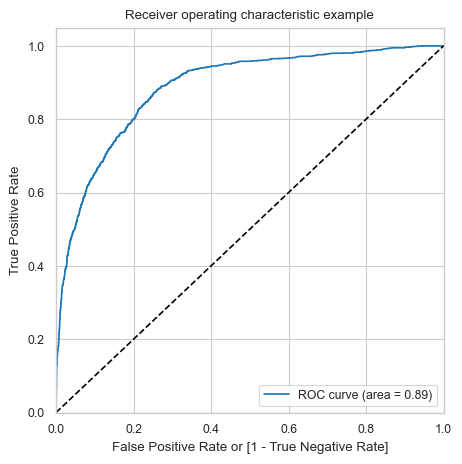

In [732]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a value of 0.86 indicating a good predictive model.

# Step 12: Finding Optimal Cutoff Point
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value.

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [733]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.889963,1979,1,1,1,1,1,1,1,1,1,1,0
1,0,0.517576,6249,1,1,1,1,1,1,1,0,0,0,0
2,0,0.684861,5557,1,1,1,1,1,1,1,1,0,0,0
3,0,0.114751,7865,0,1,1,0,0,0,0,0,0,0,0
4,0,0.228191,8491,0,1,1,1,0,0,0,0,0,0,0


In [734]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificty'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificty
0.0          0.0  0.362952     1.000000    0.000000
0.1          0.1  0.660284     0.959099    0.490037
0.2          0.2  0.763124     0.923533    0.671733
0.3          0.3  0.795611     0.847066    0.766295
0.4          0.4  0.808735     0.751037    0.841608
0.5          0.5  0.810456     0.676941    0.886525
0.6          0.6  0.806153     0.598696    0.924350
0.7          0.7  0.792599     0.522822    0.946302
0.8          0.8  0.764845     0.399526    0.972982
0.9          0.9  0.718373     0.240071    0.990881


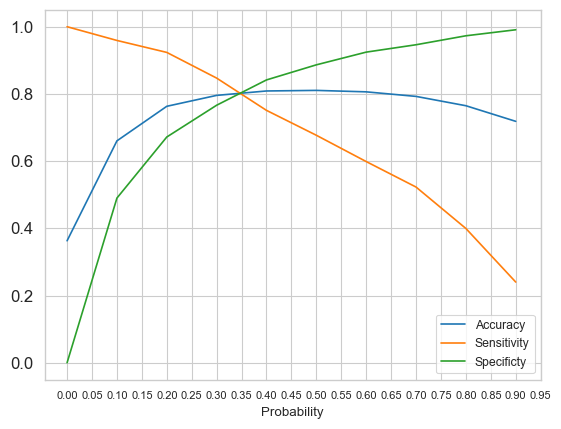

In [735]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style('whitegrid')
sns.set_context('paper')

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificty'])
plt.xticks(np.arange(0,1,step=.05), size=8)
plt.yticks(size=12)
plt.show()

Observation

From the above curve we can see that the optimal cutoff is at 0.35. 

This is the point where all the parameters - Accuracy,Sensitivity,Specificity are equally balanced

In [736]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.889963,1979,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.517576,6249,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.684861,5557,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.114751,7865,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.228191,8491,0,1,1,1,0,0,0,0,0,0,0,0


In [737]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.889963,1979,1,89
1,0,0.517576,6249,1,52
2,0,0.684861,5557,1,68
3,0,0.114751,7865,0,11
4,0,0.228191,8491,0,23


In [738]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8016351118760757

In [739]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2381,  580],
       [ 342, 1345]], dtype=int64)

In [740]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [741]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7972732661529343

In [742]:
# Let us calculate specificity
TN / float(TN+FP)

0.8041202296521446

Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

Accuracy : 80.16%

Sensitivity : 79.72%

Specificity : 80.41%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [743]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.19587977034785545


In [744]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6987012987012987


In [745]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8744032317297099


# Step 13: Metrics - Precision and Recall
To attain more stability and predict successfully in our model one needs to check two important parameters -precision and recall which tells us the score for result relevancy and how many truly relevant results are returned

In [746]:
#Calculating Precision
precision =round(TP/float(TP+FP),2)
precision

0.7

In [747]:
#Calculating Recall
recall = round(TP/float(TP+FN),2)
recall

0.8

In [748]:
from sklearn.metrics import precision_score, recall_score

#Calculating precision using precision_score function from sklearn
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6987012987012987

In [749]:
#Calculating recall using recall_score function from sklearn
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7972732661529343

# Observation
As per our business objective, the recall percentage is more significant since we don't want to left out any hot leads which are willing to get converted.
Hence Recall- 80% suggest a good model

In [750]:
from sklearn.metrics import precision_recall_curve

In [751]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

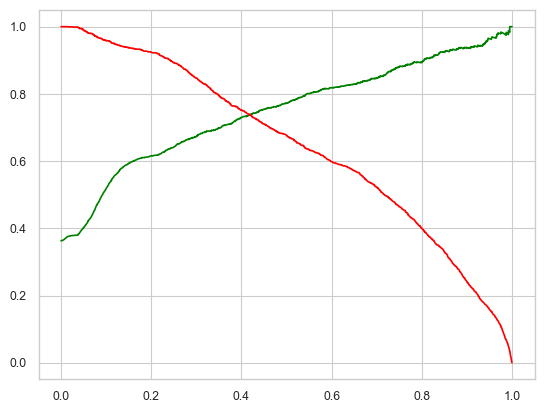

In [752]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

As seen from above,there is tradeoff between Precision and Recall.Precision and Recall are inversely related means if one increases other will genuinely decrease.

# Step 14: Making predictions on the test set

In [753]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Dual Specialization Student,Lead Source_Lateral Student,Lead Source_Not specified,Lead Source_Other Leads,Lead Source_Potential Lead,Lead Source_Student of SomeSchool
8970,-1.144209,-0.560701,-1.266390,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8280,-0.783851,-0.236439,-0.628396,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6941,-0.783851,-1.021301,-1.266390,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7343,4.621518,0.028867,-0.545456,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3734,-0.063135,-0.582810,0.647593,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [754]:
X_test = X_test[col12]
X_test.head()

,Total Time Spent on Website,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Activity_Email Bounced,Last Activity_Email Opened,Lead Source_Potential Lead,Lead Source_Student of SomeSchool
8970,-0.560701,0,1,1,0,0,0,1,0
8280,-0.236439,0,1,0,0,0,1,0,0
6941,-1.021301,0,1,0,0,0,1,0,0
7343,0.028867,0,1,1,0,0,0,0,0
3734,-0.582810,0,1,1,0,0,0,0,0


In [755]:
X_test_sm = sm.add_constant(X_test)

In [756]:
#making predictions on test set
y_test_pred = res.predict(X_test_sm)

In [757]:
y_test_pred[:10]

8970    0.360979
8280    0.170519
6941    0.078273
7343    0.130811
3734    0.070252
7889    0.446763
837     0.077232
8227    0.298813
7245    0.990811
8622    0.087245
dtype: float64

In [758]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [759]:
# Let's see the head
y_pred_1.head()

,0
8970,0.360979
8280,0.170519
6941,0.078273
7343,0.130811
3734,0.070252


In [760]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [761]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [762]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [763]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [764]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8970,0.360979
1,0,8280,0.170519
2,0,6941,0.078273
3,0,7343,0.130811
4,0,3734,0.070252


In [765]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [766]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,8970,0.360979
1,0,8280,0.170519
2,0,6941,0.078273
3,0,7343,0.130811
4,0,3734,0.070252


In [767]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [768]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,8970,0,0.360979,36
1,8280,0,0.170519,17
2,6941,0,0.078273,8
3,7343,0,0.130811,13
4,3734,0,0.070252,7


In [769]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [770]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8970,0,0.360979,36,1
1,8280,0,0.170519,17,0
2,6941,0,0.078273,8,0
3,7343,0,0.130811,13,0
4,3734,0,0.070252,7,0


In [771]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8087349397590361

In [772]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1029,  229],
       [ 152,  582]], dtype=int64)

In [773]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [774]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7929155313351499

In [775]:
# Let us calculate specificity
TN / float(TN+FP)

0.8179650238473768

In [776]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.717632552404439

In [777]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7929155313351499

# Observation:

After running the model on the Test Data these are the figures we obtain:

Accuracy : 80.87%

Sensitivity : 79.29%

Specificity : 81.79%

Final Observation:

Let us compare the values obtained for Train & Test:

Train Data:

Accuracy : 80.16%

Sensitivity : 79.72%

Specificity : 80.41%

Test Data:

Accuracy : 80.87%

Sensitivity : 79.29%

Specificity : 81.79%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

# Thank You